In [58]:
import os
import pandas as pd

import sys
import os

# Add the parent directory to sys.path (the directory containing both 'filtering' and 'stateAnalysis_tools')
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

# Now you can import from stateAnalysis_tools
from stateAnalysis_tools.stateAnalysis_tools import calculate_area_from_residues_with_chain


#Example usage of the intracellular gate area calculation
if __name__ == "__main__":
    pdb_file = '/Users/adrianahernandezgonzalez/LabNotebook/10-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_8_16_10/pdb/model_1_ptm_r0_seed2.pdb'
    # S6_I: LEU290, SER 294, S6_II: LEU 638, V642, S6_III: V1071, ILE1075, S6_IV: I1401, F1405

    residues_IG = [('LEU', 290), ('SER', 294), ('LEU', 638), ('VAL', 642), ('VAL',1071),('ILE',1075),('ILE',1401),('PHE',1405)]  # Example residues
    chain = 'A'

    #print("\nArea between residues:")
    residue_pairs_distances, area = calculate_area_from_residues_with_chain(pdb_file, residues_IG, chain)

    print("\nResidue pairs and distances:")
    for pair, distance in residue_pairs_distances.items():
        print(f"{pair}: {distance:.2f} Å")

    print(f"\nTotal area: {area:.2f} square Å")

    # Selectivity Filter: E252,E595, E1024, E1353
    residues_SF= [('GLU', 252), ('GLU', 595), ('GLU', 1024), ('GLU', 1353)]  # Example residues
    chain_SF = 'A'
    #print("\nArea between residues:")
    residue_pairs_distances, area = calculate_area_from_residues_with_chain(pdb_file, residues_SF, chain)

    print("\nResidue pairs and distances:")
    for pair, distance in residue_pairs_distances.items():
        print(f"{pair}: {distance:.2f} Å")

    print(f"\nTotal area: {area:.2f} square Å")

    #up
    #VSDI_S3: ASP108 VSDII_S2: ASP439 VSDIII_S2:PHE817, VSDIV_S3 : LEU1155
    residues_Up= [('ASP', 108), ('ASN', 439), ('PHE', 817), ('LEU', 1155)]  # Example residues
    chain_SF = 'A'
    #print("\nArea between residues:")
    residue_pairs_distances, area = calculate_area_from_residues_with_chain(pdb_file, residues_Up, chain)

    print("\nResidue pairs and distances:")
    for pair, distance in residue_pairs_distances.items():
        print(f"{pair}: {distance:.2f} Å")

    print(f"\nTotal area: {area:.2f} square Å")

    #Down
    #VSDI_S2: ILE68  VSDII_S2: TYR465 VSDIII_S2: ILE841, VSDIV_S2: TYR1129
    residues_Down= [('ILE',68), ('TYR', 465), ('ILE', 841), ('TYR', 1129)]  # Example residues
    chain_SF = 'A'
    #print("\nArea between residues:")
    residue_pairs_distances, area = calculate_area_from_residues_with_chain(pdb_file, residues_Down, chain)

    print("\nResidue pairs and distances:")
    for pair, distance in residue_pairs_distances.items():
        print(f"{pair}: {distance:.2f} Å")

    print(f"\nTotal area: {area:.2f} square Å")







Residue pairs and coordinates:
LEU290 (CA: (2.58, -3.945, -10.18)) to SER294 (CA: (4.594, 0.289, -13.195)): Distance = 5.57 Å
SER294 (CA: (4.594, 0.289, -13.195)) to LEU638 (CA: (10.227, -1.703, -11.172)): Distance = 6.31 Å
LEU638 (CA: (10.227, -1.703, -11.172)) to VAL642 (CA: (11.688, 3.295, -13.812)): Distance = 5.84 Å
VAL642 (CA: (11.688, 3.295, -13.812)) to VAL1071 (CA: (17.656, -8.234, -17.125)): Distance = 13.40 Å
VAL1071 (CA: (17.656, -8.234, -17.125)) to ILE1075 (CA: (19.656, -3.135, -17.438)): Distance = 5.49 Å
ILE1075 (CA: (19.656, -3.135, -17.438)) to ILE1401 (CA: (13.406, -17.953, -26.688)): Distance = 18.55 Å
ILE1401 (CA: (13.406, -17.953, -26.688)) to PHE1405 (CA: (12.773, -13.289, -28.828)): Distance = 5.17 Å
PHE1405 (CA: (12.773, -13.289, -28.828)) to LEU290 (CA: (2.58, -3.945, -10.18)): Distance = 23.22 Å

Area formed by the residues: 131.01 square Å

Residue pairs and distances:
LEU290-SER294: 5.57 Å
SER294-LEU638: 6.31 Å
LEU638-VAL642: 5.84 Å
VAL642-VAL1071: 13.40 Å

In [26]:
import os
import matplotlib.pyplot as plt

# Define the residues and chain
residues_Up = [('ASP', 108), ('ASN', 439), ('PHE', 817), ('LEU', 1155)]  # Example residues for "Up"
residues_Down = [('ILE', 68), ('TYR', 465), ('ILE', 841), ('TYR', 1129)]  # Example residues for "Down"
chain = 'A'  # Chain to use

# Define the folder with PDB files
#pdb_folder = '/Users/adrianahernandezgonzalez/LabNotebook/10-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_8_16_10/pdb/'  # Replace with your actual folder path
pdb_folder = '/Users/adrianahernandezgonzalez/LabNotebook/10-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_256_512_10/pdb/'

# Store results
results = []

# Loop over all PDB files in the folder
for pdb_file in os.listdir(pdb_folder):
    if pdb_file.endswith(".pdb"):
        pdb_file_path = os.path.join(pdb_folder, pdb_file)

        # Calculate the area for the "up" residues
        residue_pairs_distances_up, area_up = calculate_area_from_residues_with_chain(pdb_file_path, residues_Up, chain)
        # Calculate the area for the "down" residues
        residue_pairs_distances_down, area_down = calculate_area_from_residues_with_chain(pdb_file_path, residues_Down, chain)

        # Append results
        results.append({
            'pdb_file': pdb_file,
            'area_up': area_up,
            'area_down': area_down
        })

# Display the results
for result in results:
    print(f"PDB: {result['pdb_file']}, Area Up: {result['area_up']:.2f} Å², Area Down: {result['area_down']:.2f} Å²")



Residue pairs and coordinates:
ASP108 (CA: (23.219, -46.719, 10.383)) to ASN439 (CA: (36.281, 26.812, 5.883)): Distance = 74.82 Å
ASN439 (CA: (36.281, 26.812, 5.883)) to PHE817 (CA: (-3.74, 16.984, -38.125)): Distance = 60.29 Å
PHE817 (CA: (-3.74, 16.984, -38.125)) to LEU1155 (CA: (-3.836, -36.25, -25.938)): Distance = 54.61 Å
LEU1155 (CA: (-3.836, -36.25, -25.938)) to ASP108 (CA: (23.219, -46.719, 10.383)): Distance = 46.48 Å

Area formed by the residues: 2127.83 square Å

Residue pairs and coordinates:
ILE68 (CA: (3.43, -33.562, 37.25)) to TYR465 (CA: (17.922, 29.688, 40.188)): Distance = 64.96 Å
TYR465 (CA: (17.922, 29.688, 40.188)) to ILE841 (CA: (-22.0, 38.938, -16.562)): Distance = 70.00 Å
ILE841 (CA: (-22.0, 38.938, -16.562)) to TYR1129 (CA: (-30.031, -32.125, -4.676)): Distance = 72.50 Å
TYR1129 (CA: (-30.031, -32.125, -4.676)) to ILE68 (CA: (3.43, -33.562, 37.25)): Distance = 53.66 Å

Area formed by the residues: 2524.25 square Å

Residue pairs and coordinates:
ASP108 (CA: (-


Residue pairs and coordinates:
ASP108 (CA: (-7.801, -47.438, -22.031)) to ASN439 (CA: (45.625, 0.907, -3.697)): Distance = 74.35 Å
ASN439 (CA: (45.625, 0.907, -3.697)) to PHE817 (CA: (0.513, 36.938, -20.516)): Distance = 60.13 Å
PHE817 (CA: (0.513, 36.938, -20.516)) to LEU1155 (CA: (-30.75, -6.621, -30.688)): Distance = 54.57 Å
LEU1155 (CA: (-30.75, -6.621, -30.688)) to ASP108 (CA: (-7.801, -47.438, -22.031)): Distance = 47.62 Å

Area formed by the residues: 3190.81 square Å

Residue pairs and coordinates:
ILE68 (CA: (-9.273, -47.25, 13.734)) to TYR465 (CA: (40.188, -10.93, 33.219)): Distance = 64.38 Å
TYR465 (CA: (40.188, -10.93, 33.219)) to ILE841 (CA: (2.564, 49.375, 11.219)): Distance = 74.41 Å
ILE841 (CA: (2.564, 49.375, 11.219)) to TYR1129 (CA: (-42.812, -7.512, 0.719)): Distance = 73.52 Å
TYR1129 (CA: (-42.812, -7.512, 0.719)) to ILE68 (CA: (-9.273, -47.25, 13.734)): Distance = 53.60 Å

Area formed by the residues: 4030.17 square Å

Residue pairs and coordinates:
ASP108 (CA: (2


Residue pairs and coordinates:
ASP108 (CA: (-10.875, -50.75, -19.172)) to ASN439 (CA: (44.719, -5.371, 10.5)): Distance = 77.66 Å
ASN439 (CA: (44.719, -5.371, 10.5)) to PHE817 (CA: (12.227, 32.625, -24.234)): Distance = 60.88 Å
PHE817 (CA: (12.227, 32.625, -24.234)) to LEU1155 (CA: (-20.984, -7.371, -40.125)): Distance = 54.36 Å
LEU1155 (CA: (-20.984, -7.371, -40.125)) to ASP108 (CA: (-10.875, -50.75, -19.172)): Distance = 49.22 Å

Area formed by the residues: 2715.89 square Å

Residue pairs and coordinates:
ILE68 (CA: (-22.219, -41.812, 12.688)) to TYR465 (CA: (26.562, -10.508, 44.75)): Distance = 66.24 Å
TYR465 (CA: (26.562, -10.508, 44.75)) to ILE841 (CA: (10.906, 48.219, 7.93)): Distance = 71.06 Å
ILE841 (CA: (10.906, 48.219, 7.93)) to TYR1129 (CA: (-40.969, -4.004, -13.32)): Distance = 76.61 Å
TYR1129 (CA: (-40.969, -4.004, -13.32)) to ILE68 (CA: (-22.219, -41.812, 12.688)): Distance = 49.57 Å

Area formed by the residues: 3147.66 square Å

Residue pairs and coordinates:
ASP108 (


Residue pairs and coordinates:
ILE68 (CA: (-32.906, 9.914, -36.156)) to TYR465 (CA: (-34.844, 28.984, 26.406)): Distance = 65.43 Å
TYR465 (CA: (-34.844, 28.984, 26.406)) to ILE841 (CA: (36.531, 12.227, 31.5)): Distance = 73.49 Å
ILE841 (CA: (36.531, 12.227, 31.5)) to TYR1129 (CA: (19.812, 1.029, -39.25)): Distance = 73.56 Å
TYR1129 (CA: (19.812, 1.029, -39.25)) to ILE68 (CA: (-32.906, 9.914, -36.156)): Distance = 53.55 Å

Area formed by the residues: 1033.77 square Å

Residue pairs and coordinates:
ASP108 (CA: (36.938, 19.547, -34.344)) to ASN439 (CA: (-24.594, -22.641, -30.297)): Distance = 74.72 Å
ASN439 (CA: (-24.594, -22.641, -30.297)) to PHE817 (CA: (2.4, -39.094, 19.734)): Distance = 59.18 Å
PHE817 (CA: (2.4, -39.094, 19.734)) to LEU1155 (CA: (44.594, -6.895, 8.578)): Distance = 54.24 Å
LEU1155 (CA: (44.594, -6.895, 8.578)) to ASP108 (CA: (36.938, 19.547, -34.344)): Distance = 50.99 Å

Area formed by the residues: 1756.71 square Å

Residue pairs and coordinates:
ILE68 (CA: (13.6


Residue pairs and coordinates:
ASP108 (CA: (6.578, 53.969, 2.783)) to ASN439 (CA: (17.828, -4.383, -42.438)): Distance = 74.68 Å
ASN439 (CA: (17.828, -4.383, -42.438)) to PHE817 (CA: (27.922, -28.578, 11.055)): Distance = 59.57 Å
PHE817 (CA: (27.922, -28.578, 11.055)) to LEU1155 (CA: (19.531, 20.828, 34.281)): Distance = 55.23 Å
LEU1155 (CA: (19.531, 20.828, 34.281)) to ASP108 (CA: (6.578, 53.969, 2.783)): Distance = 47.52 Å

Area formed by the residues: 339.34 square Å

Residue pairs and coordinates:
ILE68 (CA: (-26.297, 43.469, -3.742)) to TYR465 (CA: (-20.828, -4.379, -49.25)): Distance = 66.26 Å
TYR465 (CA: (-20.828, -4.379, -49.25)) to ILE841 (CA: (-1.283, -47.531, 2.75)): Distance = 70.34 Å
ILE841 (CA: (-1.283, -47.531, 2.75)) to TYR1129 (CA: (-13.062, 14.641, 39.781)): Distance = 73.32 Å
TYR1129 (CA: (-13.062, 14.641, 39.781)) to ILE68 (CA: (-26.297, 43.469, -3.742)): Distance = 53.86 Å

Area formed by the residues: 591.24 square Å

Residue pairs and coordinates:
ASP108 (CA: (1


Residue pairs and coordinates:
ASP108 (CA: (-21.516, -11.844, -49.0)) to ASN439 (CA: (40.969, -13.375, -8.43)): Distance = 74.52 Å
ASN439 (CA: (40.969, -13.375, -8.43)) to PHE817 (CA: (18.734, 39.75, 7.637)): Distance = 59.79 Å
PHE817 (CA: (18.734, 39.75, 7.637)) to LEU1155 (CA: (-22.625, 33.094, -26.578)): Distance = 54.09 Å
LEU1155 (CA: (-22.625, 33.094, -26.578)) to ASP108 (CA: (-21.516, -11.844, -49.0)): Distance = 50.23 Å

Area formed by the residues: 2575.72 square Å

Residue pairs and coordinates:
ILE68 (CA: (-31.484, -30.719, -20.641)) to TYR465 (CA: (23.109, -41.969, 11.578)): Distance = 64.38 Å
TYR465 (CA: (23.109, -41.969, 11.578)) to ILE841 (CA: (17.422, 23.594, 39.594)): Distance = 71.52 Å
ILE841 (CA: (17.422, 23.594, 39.594)) to TYR1129 (CA: (-41.906, 18.359, -3.326)): Distance = 73.41 Å
TYR1129 (CA: (-41.906, 18.359, -3.326)) to ILE68 (CA: (-31.484, -30.719, -20.641)): Distance = 53.08 Å

Area formed by the residues: 3240.78 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ASP108 (CA: (40.406, -27.031, 21.344)) to ASN439 (CA: (21.422, 36.125, -14.516)): Distance = 75.07 Å
ASN439 (CA: (21.422, 36.125, -14.516)) to PHE817 (CA: (-12.797, -5.324, -40.531)): Distance = 59.71 Å
PHE817 (CA: (-12.797, -5.324, -40.531)) to LEU1155 (CA: (8.898, -43.719, -7.75)): Distance = 54.95 Å
LEU1155 (CA: (8.898, -43.719, -7.75)) to ASP108 (CA: (40.406, -27.031, 21.344)): Distance = 46.02 Å

Area formed by the residues: 2259.90 square Å

Residue pairs and coordinates:
ILE68 (CA: (18.969, -10.844, 44.656)) to TYR465 (CA: (5.41, 48.656, 18.734)): Distance = 66.30 Å
TYR465 (CA: (5.41, 48.656, 18.734)) to ILE841 (CA: (-38.188, 15.586, -26.562)): Distance = 71.04 Å
ILE841 (CA: (-38.188, 15.586, -26.562)) to TYR1129 (CA: (-14.859, -39.062, 15.828)): Distance = 72.99 Å
TYR1129 (CA: (-14.859, -39.062, 15.828)) to ILE68 (CA: (18.969, -10.844, 44.656)): Distance = 52.65 Å

Area formed by the residues: 2774.70 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ASP108 (CA: (48.281, -16.141, 19.641)) to ASN439 (CA: (14.07, 9.125, -42.688)): Distance = 75.46 Å
ASN439 (CA: (14.07, 9.125, -42.688)) to PHE817 (CA: (-27.406, -26.219, -20.047)): Distance = 59.01 Å
PHE817 (CA: (-27.406, -26.219, -20.047)) to LEU1155 (CA: (5.883, -38.875, 21.844)): Distance = 54.98 Å
LEU1155 (CA: (5.883, -38.875, 21.844)) to ASP108 (CA: (48.281, -16.141, 19.641)): Distance = 48.16 Å

Area formed by the residues: 1775.23 square Å

Residue pairs and coordinates:
ILE68 (CA: (37.031, 15.852, 29.25)) to TYR465 (CA: (13.266, 44.281, -26.094)): Distance = 66.60 Å
TYR465 (CA: (13.266, 44.281, -26.094)) to ILE841 (CA: (-43.312, 4.703, -18.641)): Distance = 69.45 Å
ILE841 (CA: (-43.312, 4.703, -18.641)) to TYR1129 (CA: (-5.75, -14.172, 41.125)): Distance = 73.07 Å
TYR1129 (CA: (-5.75, -14.172, 41.125)) to ILE68 (CA: (37.031, 15.852, 29.25)): Distance = 53.60 Å

Area formed by the residues: 2242.14 square Å

Residue pairs and coordinates:
ASP108 (


Residue pairs and coordinates:
ASP108 (CA: (47.781, -0.55, 25.062)) to ASN439 (CA: (13.352, 32.688, -31.078)): Distance = 73.77 Å
ASN439 (CA: (13.352, 32.688, -31.078)) to PHE817 (CA: (-8.781, -23.094, -35.375)): Distance = 60.17 Å
PHE817 (CA: (-8.781, -23.094, -35.375)) to LEU1155 (CA: (21.203, -37.188, 8.945)): Distance = 55.33 Å
LEU1155 (CA: (21.203, -37.188, 8.945)) to ASP108 (CA: (47.781, -0.55, 25.062)): Distance = 48.05 Å

Area formed by the residues: 2064.66 square Å

Residue pairs and coordinates:
ILE68 (CA: (21.703, 15.977, 42.344)) to TYR465 (CA: (-6.66, 53.094, -4.328)): Distance = 66.03 Å
TYR465 (CA: (-6.66, 53.094, -4.328)) to ILE841 (CA: (-39.344, -6.566, -28.25)): Distance = 72.11 Å
ILE841 (CA: (-39.344, -6.566, -28.25)) to TYR1129 (CA: (-3.172, -28.812, 30.578)): Distance = 72.55 Å
TYR1129 (CA: (-3.172, -28.812, 30.578)) to ILE68 (CA: (21.703, 15.977, 42.344)): Distance = 52.57 Å

Area formed by the residues: 2539.37 square Å

Residue pairs and coordinates:
ASP108 (CA


Residue pairs and coordinates:
ASP108 (CA: (17.891, 49.438, -4.527)) to ASN439 (CA: (4.703, -10.688, -45.688)): Distance = 74.05 Å
ASN439 (CA: (4.703, -10.688, -45.688)) to PHE817 (CA: (24.938, -34.188, 6.375)): Distance = 60.60 Å
PHE817 (CA: (24.938, -34.188, 6.375)) to LEU1155 (CA: (30.844, 15.438, 26.375)): Distance = 53.83 Å
LEU1155 (CA: (30.844, 15.438, 26.375)) to ASP108 (CA: (17.891, 49.438, -4.527)): Distance = 47.74 Å

Area formed by the residues: 1185.09 square Å

Residue pairs and coordinates:
ILE68 (CA: (-17.438, 46.125, -2.242)) to TYR465 (CA: (-32.938, -0.022, -42.188)): Distance = 62.97 Å
TYR465 (CA: (-32.938, -0.022, -42.188)) to ILE841 (CA: (-6.352, -49.812, 5.793)): Distance = 74.08 Å
ILE841 (CA: (-6.352, -49.812, 5.793)) to TYR1129 (CA: (-0.273, 15.703, 39.031)): Distance = 73.72 Å
TYR1129 (CA: (-0.273, 15.703, 39.031)) to ILE68 (CA: (-17.438, 46.125, -2.242)): Distance = 54.07 Å

Area formed by the residues: 1654.05 square Å

Residue pairs and coordinates:
ASP108 (


Residue pairs and coordinates:
ILE68 (CA: (-47.938, -9.086, -8.727)) to TYR465 (CA: (-11.75, -29.375, 42.25)): Distance = 65.73 Å
TYR465 (CA: (-11.75, -29.375, 42.25)) to ILE841 (CA: (34.844, 19.266, 25.781)): Distance = 69.34 Å
ILE841 (CA: (34.844, 19.266, 25.781)) to TYR1129 (CA: (-16.375, 32.219, -24.219)): Distance = 72.74 Å
TYR1129 (CA: (-16.375, 32.219, -24.219)) to ILE68 (CA: (-47.938, -9.086, -8.727)): Distance = 54.24 Å

Area formed by the residues: 2615.00 square Å

Residue pairs and coordinates:
ASP108 (CA: (-8.008, -49.406, -15.883)) to ASN439 (CA: (44.75, -2.77, 8.789)): Distance = 74.61 Å
ASN439 (CA: (44.75, -2.77, 8.789)) to PHE817 (CA: (9.547, 31.906, -26.453)): Distance = 60.69 Å
PHE817 (CA: (9.547, 31.906, -26.453)) to LEU1155 (CA: (-22.5, -10.383, -36.562)): Distance = 54.01 Å
LEU1155 (CA: (-22.5, -10.383, -36.562)) to ASP108 (CA: (-8.008, -49.406, -15.883)): Distance = 46.48 Å

Area formed by the residues: 2667.29 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ILE68 (CA: (-29.531, -32.531, -25.328)) to TYR465 (CA: (-45.438, 25.375, 1.444)): Distance = 65.75 Å
TYR465 (CA: (-45.438, 25.375, 1.444)) to ILE841 (CA: (25.672, 41.781, 4.723)): Distance = 73.05 Å
ILE841 (CA: (25.672, 41.781, 4.723)) to TYR1129 (CA: (23.766, -24.172, -28.625)): Distance = 73.93 Å
TYR1129 (CA: (23.766, -24.172, -28.625)) to ILE68 (CA: (-29.531, -32.531, -25.328)): Distance = 54.05 Å

Area formed by the residues: 3938.92 square Å

Residue pairs and coordinates:
ASP108 (CA: (17.156, -49.656, 8.18)) to ASN439 (CA: (40.0, 21.859, 6.496)): Distance = 75.09 Å
ASN439 (CA: (40.0, 21.859, 6.496)) to PHE817 (CA: (-2.203, 19.516, -36.969)): Distance = 60.63 Å
PHE817 (CA: (-2.203, 19.516, -36.969)) to LEU1155 (CA: (-8.578, -34.062, -26.812)): Distance = 54.90 Å
LEU1155 (CA: (-8.578, -34.062, -26.812)) to ASP108 (CA: (17.156, -49.656, 8.18)): Distance = 46.15 Å

Area formed by the residues: 2221.41 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ASP108 (CA: (-13.633, -46.0, -20.875)) to ASN439 (CA: (44.219, -8.992, 8.0)): Distance = 74.50 Å
ASN439 (CA: (44.219, -8.992, 8.0)) to PHE817 (CA: (14.328, 33.656, -21.266)): Distance = 59.74 Å
PHE817 (CA: (14.328, 33.656, -21.266)) to LEU1155 (CA: (-22.422, -3.912, -37.312)): Distance = 54.95 Å
LEU1155 (CA: (-22.422, -3.912, -37.312)) to ASP108 (CA: (-13.633, -46.0, -20.875)): Distance = 46.03 Å

Area formed by the residues: 2725.20 square Å

Residue pairs and coordinates:
ILE68 (CA: (-23.531, -41.562, 13.273)) to TYR465 (CA: (27.797, -16.203, 42.781)): Distance = 64.41 Å
TYR465 (CA: (27.797, -16.203, 42.781)) to ILE841 (CA: (12.195, 47.375, 11.172)): Distance = 72.70 Å
ILE841 (CA: (12.195, 47.375, 11.172)) to TYR1129 (CA: (-41.906, -0.003, -10.234)): Distance = 75.03 Å
TYR1129 (CA: (-41.906, -0.003, -10.234)) to ILE68 (CA: (-23.531, -41.562, 13.273)): Distance = 51.16 Å

Area formed by the residues: 3388.97 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ILE68 (CA: (10.562, -38.719, 29.766)) to TYR465 (CA: (33.969, 22.203, 34.375)): Distance = 65.43 Å
TYR465 (CA: (33.969, 22.203, 34.375)) to ILE841 (CA: (-21.516, 43.406, -4.379)): Distance = 70.92 Å
ILE841 (CA: (-21.516, 43.406, -4.379)) to TYR1129 (CA: (-34.25, -28.422, 1.827)): Distance = 73.21 Å
TYR1129 (CA: (-34.25, -28.422, 1.827)) to ILE68 (CA: (10.562, -38.719, 29.766)): Distance = 53.80 Å

Area formed by the residues: 3613.22 square Å

Residue pairs and coordinates:
ASP108 (CA: (3.758, -52.312, -7.855)) to ASN439 (CA: (44.969, 8.75, 2.502)): Distance = 74.39 Å
ASN439 (CA: (44.969, 8.75, 2.502)) to PHE817 (CA: (-1.143, 29.812, -29.828)): Distance = 60.13 Å
PHE817 (CA: (-1.143, 29.812, -29.828)) to LEU1155 (CA: (-23.094, -20.047, -31.672)): Distance = 54.51 Å
LEU1155 (CA: (-23.094, -20.047, -31.672)) to ASP108 (CA: (3.758, -52.312, -7.855)): Distance = 48.26 Å

Area formed by the residues: 2865.37 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ILE68 (CA: (-32.406, 6.227, -37.125)) to TYR465 (CA: (-35.062, 29.234, 24.922)): Distance = 66.23 Å
TYR465 (CA: (-35.062, 29.234, 24.922)) to ILE841 (CA: (36.375, 14.859, 31.891)): Distance = 73.20 Å
ILE841 (CA: (36.375, 14.859, 31.891)) to TYR1129 (CA: (20.109, -1.059, -39.344)): Distance = 74.78 Å
TYR1129 (CA: (20.109, -1.059, -39.344)) to ILE68 (CA: (-32.406, 6.227, -37.125)): Distance = 53.06 Å

Area formed by the residues: 1279.91 square Å

Residue pairs and coordinates:
ASP108 (CA: (-2.215, -10.234, -54.094)) to ASN439 (CA: (41.281, -16.844, 5.195)): Distance = 73.83 Å
ASN439 (CA: (41.281, -16.844, 5.195)) to PHE817 (CA: (14.719, 35.312, 16.016)): Distance = 59.52 Å
PHE817 (CA: (14.719, 35.312, 16.016)) to LEU1155 (CA: (-12.602, 30.078, -31.094)): Distance = 54.71 Å
LEU1155 (CA: (-12.602, 30.078, -31.094)) to ASP108 (CA: (-2.215, -10.234, -54.094)): Distance = 47.56 Å

Area formed by the residues: 1624.37 square Å

Residue pairs and coordinates:
IL


Residue pairs and coordinates:
ILE68 (CA: (2.984, -24.359, 44.906)) to TYR465 (CA: (-45.688, -28.047, 3.881)): Distance = 63.76 Å
TYR465 (CA: (-45.688, -28.047, 3.881)) to ILE841 (CA: (-2.947, -3.977, -47.5)): Distance = 71.04 Å
ILE841 (CA: (-2.947, -3.977, -47.5)) to TYR1129 (CA: (41.594, -9.984, 10.961)): Distance = 73.74 Å
TYR1129 (CA: (41.594, -9.984, 10.961)) to ILE68 (CA: (2.984, -24.359, 44.906)): Distance = 53.38 Å

Area formed by the residues: 943.06 square Å

Residue pairs and coordinates:
ASP108 (CA: (14.602, -50.812, 1.04)) to ASN439 (CA: (40.469, 19.516, 4.328)): Distance = 75.01 Å
ASN439 (CA: (40.469, 19.516, 4.328)) to PHE817 (CA: (-4.855, 22.797, -34.938)): Distance = 60.06 Å
PHE817 (CA: (-4.855, 22.797, -34.938)) to LEU1155 (CA: (-14.258, -30.906, -28.641)): Distance = 54.88 Å
LEU1155 (CA: (-14.258, -30.906, -28.641)) to ASP108 (CA: (14.602, -50.812, 1.04)): Distance = 45.94 Å

Area formed by the residues: 2504.73 square Å

Residue pairs and coordinates:
ILE68 (CA: (1


Residue pairs and coordinates:
ILE68 (CA: (14.953, 14.219, 45.375)) to TYR465 (CA: (-22.625, 46.438, 3.23)): Distance = 65.01 Å
TYR465 (CA: (-22.625, 46.438, 3.23)) to ILE841 (CA: (-35.5, -18.406, -28.047)): Distance = 73.14 Å
ILE841 (CA: (-35.5, -18.406, -28.047)) to TYR1129 (CA: (7.391, -34.469, 28.25)): Distance = 72.57 Å
TYR1129 (CA: (7.391, -34.469, 28.25)) to ILE68 (CA: (14.953, 14.219, 45.375)): Distance = 52.16 Å

Area formed by the residues: 2530.64 square Å

Residue pairs and coordinates:
ASP108 (CA: (1.397, 13.289, -52.531)) to ASN439 (CA: (-23.547, -39.219, -5.113)): Distance = 75.02 Å
ASN439 (CA: (-23.547, -39.219, -5.113)) to PHE817 (CA: (27.938, -26.906, 20.109)): Distance = 58.64 Å
PHE817 (CA: (27.938, -26.906, 20.109)) to LEU1155 (CA: (39.969, 9.625, -19.938)): Distance = 55.52 Å
LEU1155 (CA: (39.969, 9.625, -19.938)) to ASP108 (CA: (1.397, 13.289, -52.531)): Distance = 50.63 Å

Area formed by the residues: 1924.70 square Å

Residue pairs and coordinates:
ILE68 (CA: (


Residue pairs and coordinates:
ILE68 (CA: (32.625, -4.055, 35.406)) to TYR465 (CA: (9.289, 52.344, 9.227)): Distance = 66.41 Å
TYR465 (CA: (9.289, 52.344, 9.227)) to ILE841 (CA: (-45.406, 15.188, -14.273)): Distance = 70.17 Å
ILE841 (CA: (-45.406, 15.188, -14.273)) to TYR1129 (CA: (-7.828, -36.438, 20.625)): Distance = 72.77 Å
TYR1129 (CA: (-7.828, -36.438, 20.625)) to ILE68 (CA: (32.625, -4.055, 35.406)): Distance = 53.88 Å

Area formed by the residues: 3628.57 square Å

Residue pairs and coordinates:
ASP108 (CA: (49.219, -14.141, 13.789)) to ASN439 (CA: (10.68, 40.094, -18.703)): Distance = 74.04 Å
ASN439 (CA: (10.68, 40.094, -18.703)) to PHE817 (CA: (-17.266, -9.125, -41.312)): Distance = 60.95 Å
PHE817 (CA: (-17.266, -9.125, -41.312)) to LEU1155 (CA: (18.656, -40.5, -13.172)): Distance = 55.38 Å
LEU1155 (CA: (18.656, -40.5, -13.172)) to ASP108 (CA: (49.219, -14.141, 13.789)): Distance = 48.54 Å

Area formed by the residues: 2659.14 square Å

Residue pairs and coordinates:
ILE68 (C


Residue pairs and coordinates:
ILE68 (CA: (-34.781, 19.172, -28.828)) to TYR465 (CA: (-41.0, -30.109, 15.078)): Distance = 66.30 Å
TYR465 (CA: (-41.0, -30.109, 15.078)) to ILE841 (CA: (17.469, -8.375, 42.875)): Distance = 68.29 Å
ILE841 (CA: (17.469, -8.375, 42.875)) to TYR1129 (CA: (9.5, 41.188, -10.078)): Distance = 72.97 Å
TYR1129 (CA: (9.5, 41.188, -10.078)) to ILE68 (CA: (-34.781, 19.172, -28.828)): Distance = 52.89 Å

Area formed by the residues: 2558.20 square Å

Residue pairs and coordinates:
ASP108 (CA: (23.375, -46.469, 2.174)) to ASN439 (CA: (35.812, 27.875, 1.037)): Distance = 75.39 Å
ASN439 (CA: (35.812, 27.875, 1.037)) to PHE817 (CA: (-11.461, 20.047, -35.969)): Distance = 60.54 Å
PHE817 (CA: (-11.461, 20.047, -35.969)) to LEU1155 (CA: (-10.273, -33.469, -27.344)): Distance = 54.22 Å
LEU1155 (CA: (-10.273, -33.469, -27.344)) to ASP108 (CA: (23.375, -46.469, 2.174)): Distance = 46.61 Å

Area formed by the residues: 2601.18 square Å

Residue pairs and coordinates:
ILE68 (C


Residue pairs and coordinates:
ILE68 (CA: (-49.094, -5.316, -0.691)) to TYR465 (CA: (-6.605, -28.438, 44.531)): Distance = 66.22 Å
TYR465 (CA: (-6.605, -28.438, 44.531)) to ILE841 (CA: (37.812, 17.641, 20.594)): Distance = 68.33 Å
ILE841 (CA: (37.812, 17.641, 20.594)) to TYR1129 (CA: (-18.5, 33.438, -21.781)): Distance = 72.22 Å
TYR1129 (CA: (-18.5, 33.438, -21.781)) to ILE68 (CA: (-49.094, -5.316, -0.691)): Distance = 53.69 Å

Area formed by the residues: 2825.23 square Å

Residue pairs and coordinates:
ASP108 (CA: (6.156, -45.25, -28.359)) to ASN439 (CA: (41.438, 16.062, -4.445)): Distance = 74.67 Å
ASN439 (CA: (41.438, 16.062, -4.445)) to PHE817 (CA: (-12.883, 36.719, -20.234)): Distance = 60.22 Å
PHE817 (CA: (-12.883, 36.719, -20.234)) to LEU1155 (CA: (-27.438, -13.883, -35.531)): Distance = 54.83 Å
LEU1155 (CA: (-27.438, -13.883, -35.531)) to ASP108 (CA: (6.156, -45.25, -28.359)): Distance = 46.52 Å

Area formed by the residues: 3107.91 square Å

Residue pairs and coordinates:
IL


Residue pairs and coordinates:
ILE68 (CA: (7.77, -11.844, 48.219)) to TYR465 (CA: (-37.406, -36.5, 10.477)): Distance = 63.82 Å
TYR465 (CA: (-37.406, -36.5, 10.477)) to ILE841 (CA: (-0.087, -13.711, -46.562)): Distance = 71.87 Å
ILE841 (CA: (-0.087, -13.711, -46.562)) to TYR1129 (CA: (42.188, 4.078, 10.672)): Distance = 73.34 Å
TYR1129 (CA: (42.188, 4.078, 10.672)) to ILE68 (CA: (7.77, -11.844, 48.219)): Distance = 53.37 Å

Area formed by the residues: 85.11 square Å

Residue pairs and coordinates:
ASP108 (CA: (39.844, -35.344, 5.172)) to ASN439 (CA: (21.219, 27.062, -28.984)): Distance = 73.54 Å
ASN439 (CA: (21.219, 27.062, -28.984)) to PHE817 (CA: (-29.891, -3.268, -33.281)): Distance = 59.59 Å
PHE817 (CA: (-29.891, -3.268, -33.281)) to LEU1155 (CA: (-4.781, -45.656, -6.906)): Distance = 55.88 Å
LEU1155 (CA: (-4.781, -45.656, -6.906)) to ASP108 (CA: (39.844, -35.344, 5.172)): Distance = 47.37 Å

Area formed by the residues: 2952.48 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ILE68 (CA: (-8.039, 45.344, 16.984)) to TYR465 (CA: (-19.531, -10.883, 49.0)): Distance = 65.72 Å
TYR465 (CA: (-19.531, -10.883, 49.0)) to ILE841 (CA: (25.25, -45.625, 1.964)): Distance = 73.65 Å
ILE841 (CA: (25.25, -45.625, 1.964)) to TYR1129 (CA: (29.234, 27.328, -16.438)): Distance = 75.34 Å
TYR1129 (CA: (29.234, 27.328, -16.438)) to ILE68 (CA: (-8.039, 45.344, 16.984)): Distance = 53.21 Å

Area formed by the residues: 2854.05 square Å

Residue pairs and coordinates:
ASP108 (CA: (40.781, -31.5, 0.152)) to ASN439 (CA: (23.469, 39.031, -11.875)): Distance = 73.61 Å
ASN439 (CA: (23.469, 39.031, -11.875)) to PHE817 (CA: (-23.875, 11.094, -36.125)): Distance = 60.08 Å
PHE817 (CA: (-23.875, 11.094, -36.125)) to LEU1155 (CA: (-1.992, -36.688, -23.594)): Distance = 54.03 Å
LEU1155 (CA: (-1.992, -36.688, -23.594)) to ASP108 (CA: (40.781, -31.5, 0.152)): Distance = 49.20 Å

Area formed by the residues: 2990.09 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ILE68 (CA: (7.984, -42.906, 24.359)) to TYR465 (CA: (36.125, 14.992, 36.031)): Distance = 65.42 Å
TYR465 (CA: (36.125, 14.992, 36.031)) to ILE841 (CA: (-20.328, 45.781, -0.563)): Distance = 73.99 Å
ILE841 (CA: (-20.328, 45.781, -0.563)) to TYR1129 (CA: (-36.281, -25.953, -0.858)): Distance = 73.49 Å
TYR1129 (CA: (-36.281, -25.953, -0.858)) to ILE68 (CA: (7.984, -42.906, 24.359)): Distance = 53.69 Å

Area formed by the residues: 3790.35 square Å

Residue pairs and coordinates:
ASP108 (CA: (15.953, 26.781, -38.344)) to ASN439 (CA: (-2.312, -42.938, -24.359)): Distance = 73.42 Å
ASN439 (CA: (-2.312, -42.938, -24.359)) to PHE817 (CA: (26.031, -29.219, 25.797)): Distance = 59.22 Å
PHE817 (CA: (26.031, -29.219, 25.797)) to LEU1155 (CA: (37.344, 21.641, 4.426)): Distance = 56.32 Å
LEU1155 (CA: (37.344, 21.641, 4.426)) to ASP108 (CA: (15.953, 26.781, -38.344)): Distance = 48.10 Å

Area formed by the residues: 1435.78 square Å

Residue pairs and coordinates:
ILE6


Residue pairs and coordinates:
ASP108 (CA: (13.203, -43.188, -25.891)) to ASN439 (CA: (36.719, 25.812, -13.891)): Distance = 73.88 Å
ASN439 (CA: (36.719, 25.812, -13.891)) to PHE817 (CA: (-22.188, 34.312, -17.938)): Distance = 59.65 Å
PHE817 (CA: (-22.188, 34.312, -17.938)) to LEU1155 (CA: (-29.078, -19.422, -26.953)): Distance = 54.92 Å
LEU1155 (CA: (-29.078, -19.422, -26.953)) to ASP108 (CA: (13.203, -43.188, -25.891)): Distance = 48.51 Å

Area formed by the residues: 3350.07 square Å

Residue pairs and coordinates:
ILE68 (CA: (17.359, -43.656, 9.75)) to TYR465 (CA: (45.656, 14.438, 22.453)): Distance = 65.86 Å
TYR465 (CA: (45.656, 14.438, 22.453)) to ILE841 (CA: (-19.609, 44.562, 16.547)): Distance = 72.12 Å
ILE841 (CA: (-19.609, 44.562, 16.547)) to TYR1129 (CA: (-34.281, -25.75, 5.555)): Distance = 72.66 Å
TYR1129 (CA: (-34.281, -25.75, 5.555)) to ILE68 (CA: (17.359, -43.656, 9.75)): Distance = 54.82 Å

Area formed by the residues: 4268.78 square Å

Residue pairs and coordinates:



Residue pairs and coordinates:
ASP108 (CA: (3.383, -44.719, 30.312)) to ASN439 (CA: (40.625, -4.426, -20.188)): Distance = 74.57 Å
ASN439 (CA: (40.625, -4.426, -20.188)) to PHE817 (CA: (-14.281, 3.0, -40.938)): Distance = 59.16 Å
PHE817 (CA: (-14.281, 3.0, -40.938)) to LEU1155 (CA: (-34.281, -29.344, -0.791)): Distance = 55.30 Å
LEU1155 (CA: (-34.281, -29.344, -0.791)) to ASP108 (CA: (3.383, -44.719, 30.312)): Distance = 51.21 Å

Area formed by the residues: 2007.30 square Å

Residue pairs and coordinates:
ILE68 (CA: (7.246, -14.43, 46.188)) to TYR465 (CA: (47.969, 19.938, 9.07)): Distance = 64.94 Å
TYR465 (CA: (47.969, 19.938, 9.07)) to ILE841 (CA: (-6.152, 35.5, -30.359)): Distance = 68.75 Å
ILE841 (CA: (-6.152, 35.5, -30.359)) to TYR1129 (CA: (-39.188, -3.863, 20.281)): Distance = 72.15 Å
TYR1129 (CA: (-39.188, -3.863, 20.281)) to ILE68 (CA: (7.246, -14.43, 46.188)): Distance = 54.21 Å

Area formed by the residues: 2335.32 square Å

Residue pairs and coordinates:
ASP108 (CA: (35.65


Residue pairs and coordinates:
ASP108 (CA: (29.5, -42.594, 8.648)) to ASN439 (CA: (33.062, 29.312, -10.352)): Distance = 74.46 Å
ASN439 (CA: (33.062, 29.312, -10.352)) to PHE817 (CA: (-16.469, 9.477, -37.656)): Distance = 59.94 Å
PHE817 (CA: (-16.469, 9.477, -37.656)) to LEU1155 (CA: (-8.203, -40.281, -16.594)): Distance = 54.66 Å
LEU1155 (CA: (-8.203, -40.281, -16.594)) to ASP108 (CA: (29.5, -42.594, 8.648)): Distance = 45.43 Å

Area formed by the residues: 2673.92 square Å

Residue pairs and coordinates:
ILE68 (CA: (17.656, -26.672, 38.812)) to TYR465 (CA: (25.875, 38.531, 26.984)): Distance = 66.77 Å
TYR465 (CA: (25.875, 38.531, 26.984)) to ILE841 (CA: (-30.188, 34.875, -15.477)): Distance = 70.42 Å
ILE841 (CA: (-30.188, 34.875, -15.477)) to TYR1129 (CA: (-26.953, -33.156, 10.625)): Distance = 72.94 Å
TYR1129 (CA: (-26.953, -33.156, 10.625)) to ILE68 (CA: (17.656, -26.672, 38.812)): Distance = 53.16 Å

Area formed by the residues: 3340.60 square Å

Residue pairs and coordinates:
AS


Residue pairs and coordinates:
ASP108 (CA: (-21.281, 11.062, -49.562)) to ASN439 (CA: (37.688, -19.234, -14.688)): Distance = 74.91 Å
ASN439 (CA: (37.688, -19.234, -14.688)) to PHE817 (CA: (26.516, 27.188, 20.047)): Distance = 59.05 Å
PHE817 (CA: (26.516, 27.188, 20.047)) to LEU1155 (CA: (-14.586, 42.594, -12.352)): Distance = 54.56 Å
LEU1155 (CA: (-14.586, 42.594, -12.352)) to ASP108 (CA: (-21.281, 11.062, -49.562)): Distance = 49.23 Å

Area formed by the residues: 1899.08 square Å

Residue pairs and coordinates:
ILE68 (CA: (-35.812, -15.141, -31.5)) to TYR465 (CA: (14.195, -49.188, -5.258)): Distance = 65.94 Å
TYR465 (CA: (14.195, -49.188, -5.258)) to ILE841 (CA: (19.375, 1.487, 44.156)): Distance = 70.97 Å
ILE841 (CA: (19.375, 1.487, 44.156)) to TYR1129 (CA: (-37.25, 25.125, 5.289)): Distance = 72.63 Å
TYR1129 (CA: (-37.25, 25.125, 5.289)) to ILE68 (CA: (-35.812, -15.141, -31.5)): Distance = 54.56 Å

Area formed by the residues: 2478.27 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ASP108 (CA: (-38.062, -1.847, -37.812)) to ASN439 (CA: (-26.156, -15.984, 34.156)): Distance = 74.30 Å
ASN439 (CA: (-26.156, -15.984, 34.156)) to PHE817 (CA: (25.844, -33.906, 10.602)): Distance = 59.83 Å
PHE817 (CA: (25.844, -33.906, 10.602)) to LEU1155 (CA: (7.949, -19.797, -39.5)): Distance = 55.04 Å
LEU1155 (CA: (7.949, -19.797, -39.5)) to ASP108 (CA: (-38.062, -1.847, -37.812)): Distance = 49.42 Å

Area formed by the residues: 424.85 square Å

Residue pairs and coordinates:
ILE68 (CA: (-29.344, 29.688, -25.828)) to TYR465 (CA: (-26.438, 22.922, 39.312)): Distance = 65.55 Å
TYR465 (CA: (-26.438, 22.922, 39.312)) to ILE841 (CA: (39.062, -8.328, 31.297)): Distance = 73.01 Å
ILE841 (CA: (39.062, -8.328, 31.297)) to TYR1129 (CA: (19.719, 11.867, -36.75)): Distance = 73.57 Å
TYR1129 (CA: (19.719, 11.867, -36.75)) to ILE68 (CA: (-29.344, 29.688, -25.828)): Distance = 53.33 Å

Area formed by the residues: 499.24 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ILE68 (CA: (-19.375, -40.562, -18.922)) to TYR465 (CA: (28.766, -32.562, 25.203)): Distance = 65.79 Å
TYR465 (CA: (28.766, -32.562, 25.203)) to ILE841 (CA: (4.238, 32.469, 36.125)): Distance = 70.36 Å
ILE841 (CA: (4.238, 32.469, 36.125)) to TYR1129 (CA: (-43.281, 8.891, -13.297)): Distance = 72.50 Å
TYR1129 (CA: (-43.281, 8.891, -13.297)) to ILE68 (CA: (-19.375, -40.562, -18.922)): Distance = 55.22 Å

Area formed by the residues: 3120.25 square Å

Residue pairs and coordinates:
ASP108 (CA: (12.344, 16.922, -48.781)) to ASN439 (CA: (8.641, -43.938, -7.637)): Distance = 73.56 Å
ASN439 (CA: (8.641, -43.938, -7.637)) to PHE817 (CA: (29.75, -2.189, 30.25)): Distance = 60.20 Å
PHE817 (CA: (29.75, -2.189, 30.25)) to LEU1155 (CA: (29.469, 34.094, -11.469)): Distance = 55.29 Å
LEU1155 (CA: (29.469, 34.094, -11.469)) to ASP108 (CA: (12.344, 16.922, -48.781)): Distance = 44.50 Å

Area formed by the residues: 878.13 square Å

Residue pairs and coordinates:
ILE68 (CA


Residue pairs and coordinates:
ILE68 (CA: (25.625, -36.531, 18.172)) to TYR465 (CA: (42.719, 26.953, 17.422)): Distance = 65.75 Å
TYR465 (CA: (42.719, 26.953, 17.422)) to ILE841 (CA: (-26.203, 42.156, 8.297)): Distance = 71.17 Å
ILE841 (CA: (-26.203, 42.156, 8.297)) to TYR1129 (CA: (-28.656, -29.703, 12.289)): Distance = 72.01 Å
TYR1129 (CA: (-28.656, -29.703, 12.289)) to ILE68 (CA: (25.625, -36.531, 18.172)): Distance = 55.02 Å

Area formed by the residues: 4276.33 square Å

Residue pairs and coordinates:
ASP108 (CA: (-7.211, 11.617, -52.844)) to ASN439 (CA: (-8.148, -44.688, -3.311)): Distance = 75.00 Å
ASN439 (CA: (-8.148, -44.688, -3.311)) to PHE817 (CA: (37.562, -14.055, 17.969)): Distance = 59.00 Å
PHE817 (CA: (37.562, -14.055, 17.969)) to LEU1155 (CA: (32.656, 22.828, -22.109)): Distance = 54.69 Å
LEU1155 (CA: (32.656, 22.828, -22.109)) to ASP108 (CA: (-7.211, 11.617, -52.844)): Distance = 51.57 Å

Area formed by the residues: 2035.21 square Å

Residue pairs and coordinates:
IL


Residue pairs and coordinates:
ASP108 (CA: (-13.727, -34.25, -37.094)) to ASN439 (CA: (32.25, -30.484, 20.516)): Distance = 73.80 Å
ASN439 (CA: (32.25, -30.484, 20.516)) to PHE817 (CA: (35.719, 26.75, -3.107)): Distance = 62.01 Å
PHE817 (CA: (35.719, 26.75, -3.107)) to LEU1155 (CA: (-1.057, 11.547, -42.438)): Distance = 55.95 Å
LEU1155 (CA: (-1.057, 11.547, -42.438)) to ASP108 (CA: (-13.727, -34.25, -37.094)): Distance = 47.82 Å

Area formed by the residues: 2055.00 square Å

Residue pairs and coordinates:
ILE68 (CA: (-36.094, -29.891, -10.133)) to TYR465 (CA: (-0.103, -33.312, 42.5)): Distance = 63.85 Å
TYR465 (CA: (-0.103, -33.312, 42.5)) to ILE841 (CA: (25.609, 32.938, 29.859)): Distance = 72.18 Å
ILE841 (CA: (25.609, 32.938, 29.859)) to TYR1129 (CA: (-27.641, 18.734, -22.984)): Distance = 76.35 Å
TYR1129 (CA: (-27.641, 18.734, -22.984)) to ILE68 (CA: (-36.094, -29.891, -10.133)): Distance = 51.00 Å

Area formed by the residues: 2470.79 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ASP108 (CA: (1.894, -49.594, -18.094)) to ASN439 (CA: (44.219, 9.703, -2.102)): Distance = 74.59 Å
ASN439 (CA: (44.219, 9.703, -2.102)) to PHE817 (CA: (-6.133, 34.688, -23.766)): Distance = 60.24 Å
PHE817 (CA: (-6.133, 34.688, -23.766)) to LEU1155 (CA: (-27.359, -15.555, -30.953)): Distance = 55.01 Å
LEU1155 (CA: (-27.359, -15.555, -30.953)) to ASP108 (CA: (1.894, -49.594, -18.094)): Distance = 46.69 Å

Area formed by the residues: 3117.74 square Å

Residue pairs and coordinates:
ILE68 (CA: (-1.687, -46.969, 17.234)) to TYR465 (CA: (40.031, -0.635, 35.219)): Distance = 64.89 Å
TYR465 (CA: (40.031, -0.635, 35.219)) to ILE841 (CA: (-8.336, 49.969, 8.055)): Distance = 75.09 Å
ILE841 (CA: (-8.336, 49.969, 8.055)) to TYR1129 (CA: (-40.844, -15.906, -0.172)): Distance = 73.92 Å
TYR1129 (CA: (-40.844, -15.906, -0.172)) to ILE68 (CA: (-1.687, -46.969, 17.234)): Distance = 52.93 Å

Area formed by the residues: 3970.70 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ILE68 (CA: (-22.578, -31.922, 31.531)) to TYR465 (CA: (36.531, -4.578, 38.781)): Distance = 65.53 Å
TYR465 (CA: (36.531, -4.578, 38.781)) to ILE841 (CA: (17.125, 41.656, -9.359)): Distance = 69.51 Å
ILE841 (CA: (17.125, 41.656, -9.359)) to TYR1129 (CA: (-43.25, 1.964, -4.727)): Distance = 72.40 Å
TYR1129 (CA: (-43.25, 1.964, -4.727)) to ILE68 (CA: (-22.578, -31.922, 31.531)): Distance = 53.76 Å

Area formed by the residues: 3064.93 square Å

Residue pairs and coordinates:
ASP108 (CA: (1.094, -53.312, -5.863)) to ASN439 (CA: (46.094, 6.172, 6.84)): Distance = 75.66 Å
ASN439 (CA: (46.094, 6.172, 6.84)) to PHE817 (CA: (6.508, 28.609, -32.531)): Distance = 60.17 Å
PHE817 (CA: (6.508, 28.609, -32.531)) to LEU1155 (CA: (-19.766, -24.859, -31.734)): Distance = 59.58 Å
LEU1155 (CA: (-19.766, -24.859, -31.734)) to ASP108 (CA: (1.094, -53.312, -5.863)): Distance = 43.75 Å

Area formed by the residues: 2613.66 square Å

Residue pairs and coordinates:
ILE68 (CA: (-1


Residue pairs and coordinates:
ILE68 (CA: (10.422, -44.594, 17.562)) to TYR465 (CA: (38.875, 12.234, 29.688)): Distance = 64.70 Å
TYR465 (CA: (38.875, 12.234, 29.688)) to ILE841 (CA: (-20.344, 43.156, 3.23)): Distance = 71.85 Å
ILE841 (CA: (-20.344, 43.156, 3.23)) to TYR1129 (CA: (-36.188, -26.547, -1.969)): Distance = 71.67 Å
TYR1129 (CA: (-36.188, -26.547, -1.969)) to ILE68 (CA: (10.422, -44.594, 17.562)): Distance = 53.66 Å

Area formed by the residues: 3889.96 square Å

Residue pairs and coordinates:
ASP108 (CA: (9.742, -21.203, 49.781)) to ASN439 (CA: (-37.531, 20.953, 10.125)): Distance = 74.73 Å
ASN439 (CA: (-37.531, 20.953, 10.125)) to PHE817 (CA: (14.68, 33.156, -16.984)): Distance = 60.08 Å
PHE817 (CA: (14.68, 33.156, -16.984)) to LEU1155 (CA: (40.344, 0.018, 18.281)): Distance = 54.78 Å
LEU1155 (CA: (40.344, 0.018, 18.281)) to ASP108 (CA: (9.742, -21.203, 49.781)): Distance = 48.78 Å

Area formed by the residues: 2168.29 square Å

Residue pairs and coordinates:
ILE68 (CA: (


Residue pairs and coordinates:
ILE68 (CA: (-42.344, 21.609, -17.25)) to TYR465 (CA: (-24.844, -42.281, -17.062)): Distance = 66.24 Å
TYR465 (CA: (-24.844, -42.281, -17.062)) to ILE841 (CA: (22.406, -26.25, 33.531)): Distance = 71.06 Å
ILE841 (CA: (22.406, -26.25, 33.531)) to TYR1129 (CA: (-9.406, 38.438, 21.375)): Distance = 73.10 Å
TYR1129 (CA: (-9.406, 38.438, 21.375)) to ILE68 (CA: (-42.344, 21.609, -17.25)): Distance = 53.48 Å

Area formed by the residues: 2982.70 square Å

Residue pairs and coordinates:
ASP108 (CA: (11.867, -28.203, 46.375)) to ASN439 (CA: (-34.781, 22.703, 17.125)): Distance = 74.99 Å
ASN439 (CA: (-34.781, 22.703, 17.125)) to PHE817 (CA: (16.156, 34.75, -12.086)): Distance = 59.94 Å
PHE817 (CA: (16.156, 34.75, -12.086)) to LEU1155 (CA: (41.344, -4.645, 15.453)): Distance = 54.27 Å
LEU1155 (CA: (41.344, -4.645, 15.453)) to ASP108 (CA: (11.867, -28.203, 46.375)): Distance = 48.79 Å

Area formed by the residues: 2454.80 square Å

Residue pairs and coordinates:
ILE6


Residue pairs and coordinates:
ILE68 (CA: (-7.289, -44.031, 29.328)) to TYR465 (CA: (-52.406, -8.969, -2.953)): Distance = 65.63 Å
TYR465 (CA: (-52.406, -8.969, -2.953)) to ILE841 (CA: (-0.374, 17.469, -42.969)): Distance = 70.76 Å
ILE841 (CA: (-0.374, 17.469, -42.969)) to TYR1129 (CA: (34.969, -29.75, -2.035)): Distance = 71.79 Å
TYR1129 (CA: (34.969, -29.75, -2.035)) to ILE68 (CA: (-7.289, -44.031, 29.328)): Distance = 54.53 Å

Area formed by the residues: 2758.63 square Å

Residue pairs and coordinates:
ASP108 (CA: (50.906, -8.992, 15.016)) to ASN439 (CA: (9.43, 29.344, -33.906)): Distance = 74.72 Å
ASN439 (CA: (9.43, 29.344, -33.906)) to PHE817 (CA: (-20.453, -23.25, -32.281)): Distance = 60.51 Å
PHE817 (CA: (-20.453, -23.25, -32.281)) to LEU1155 (CA: (16.25, -42.938, 2.248)): Distance = 54.10 Å
LEU1155 (CA: (16.25, -42.938, 2.248)) to ASP108 (CA: (50.906, -8.992, 15.016)): Distance = 50.16 Å

Area formed by the residues: 2627.61 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ILE68 (CA: (17.0, -5.746, 45.656)) to TYR465 (CA: (43.781, 28.516, -3.869)): Distance = 65.91 Å
TYR465 (CA: (43.781, 28.516, -3.869)) to ILE841 (CA: (-17.922, 27.125, -34.062)): Distance = 68.71 Å
ILE841 (CA: (-17.922, 27.125, -34.062)) to TYR1129 (CA: (-32.906, -7.555, 27.984)): Distance = 72.64 Å
TYR1129 (CA: (-32.906, -7.555, 27.984)) to ILE68 (CA: (17.0, -5.746, 45.656)): Distance = 52.97 Å

Area formed by the residues: 1890.22 square Å

Residue pairs and coordinates:
ASP108 (CA: (42.281, 28.5, 9.312)) to ASN439 (CA: (-6.766, 13.266, -44.625)): Distance = 74.48 Å
ASN439 (CA: (-6.766, 13.266, -44.625)) to PHE817 (CA: (1.044, -40.688, -19.266)): Distance = 60.13 Å
PHE817 (CA: (1.044, -40.688, -19.266)) to LEU1155 (CA: (37.406, -18.938, 14.852)): Distance = 54.40 Å
LEU1155 (CA: (37.406, -18.938, 14.852)) to ASP108 (CA: (42.281, 28.5, 9.312)): Distance = 48.01 Å

Area formed by the residues: 2192.08 square Å

Residue pairs and coordinates:
ILE68 (CA: (11


Residue pairs and coordinates:
ILE68 (CA: (-12.867, 47.75, -3.014)) to TYR465 (CA: (-32.562, 0.148, -44.969)): Distance = 66.44 Å
TYR465 (CA: (-32.562, 0.148, -44.969)) to ILE841 (CA: (-12.078, -46.875, 5.824)): Distance = 72.19 Å
ILE841 (CA: (-12.078, -46.875, 5.824)) to TYR1129 (CA: (0.796, 17.516, 38.062)): Distance = 73.15 Å
TYR1129 (CA: (0.796, 17.516, 38.062)) to ILE68 (CA: (-12.867, 47.75, -3.014)): Distance = 52.80 Å

Area formed by the residues: 1585.10 square Å

Residue pairs and coordinates:
ASP108 (CA: (37.5, 27.719, 27.281)) to ASN439 (CA: (9.273, 18.812, -41.75)): Distance = 75.11 Å
ASN439 (CA: (9.273, 18.812, -41.75)) to PHE817 (CA: (4.758, -36.5, -19.266)): Distance = 59.88 Å
PHE817 (CA: (4.758, -36.5, -19.266)) to LEU1155 (CA: (28.75, -19.625, 26.953)): Distance = 54.74 Å
LEU1155 (CA: (28.75, -19.625, 26.953)) to ASP108 (CA: (37.5, 27.719, 27.281)): Distance = 48.15 Å

Area formed by the residues: 1254.65 square Å

Residue pairs and coordinates:
ILE68 (CA: (5.117, 39.


Residue pairs and coordinates:
ASP108 (CA: (40.938, 29.594, 11.945)) to ASN439 (CA: (-1.117, 6.871, -45.969)): Distance = 75.09 Å
ASN439 (CA: (-1.117, 6.871, -45.969)) to PHE817 (CA: (3.744, -42.844, -12.797)): Distance = 59.96 Å
PHE817 (CA: (3.744, -42.844, -12.797)) to LEU1155 (CA: (34.438, -15.781, 23.203)): Distance = 54.50 Å
LEU1155 (CA: (34.438, -15.781, 23.203)) to ASP108 (CA: (40.938, 29.594, 11.945)): Distance = 47.20 Å

Area formed by the residues: 1709.03 square Å

Residue pairs and coordinates:
ILE68 (CA: (8.758, 41.156, 20.641)) to TYR465 (CA: (-27.266, 31.875, -31.0)): Distance = 63.64 Å
TYR465 (CA: (-27.266, 31.875, -31.0)) to ILE841 (CA: (-30.719, -38.906, -10.75)): Distance = 73.70 Å
ILE841 (CA: (-30.719, -38.906, -10.75)) to TYR1129 (CA: (8.18, -5.707, 41.25)): Distance = 72.93 Å
TYR1129 (CA: (8.18, -5.707, 41.25)) to ILE68 (CA: (8.758, 41.156, 20.641)): Distance = 51.20 Å

Area formed by the residues: 2160.75 square Å

Residue pairs and coordinates:
ASP108 (CA: (15.


Residue pairs and coordinates:
ASP108 (CA: (-33.406, -25.703, -34.812)) to ASN439 (CA: (19.953, -36.812, 16.734)): Distance = 75.02 Å
ASN439 (CA: (19.953, -36.812, 16.734)) to PHE817 (CA: (41.125, 11.062, -10.234)): Distance = 58.89 Å
PHE817 (CA: (41.125, 11.062, -10.234)) to LEU1155 (CA: (-1.416, 11.406, -44.719)): Distance = 54.76 Å
LEU1155 (CA: (-1.416, 11.406, -44.719)) to ASP108 (CA: (-33.406, -25.703, -34.812)): Distance = 49.99 Å

Area formed by the residues: 2189.68 square Å

Residue pairs and coordinates:
ILE68 (CA: (-47.25, -11.328, -5.742)) to TYR465 (CA: (-7.031, -27.953, 43.125)): Distance = 65.44 Å
TYR465 (CA: (-7.031, -27.953, 43.125)) to ILE841 (CA: (33.719, 23.859, 22.0)): Distance = 69.22 Å
ILE841 (CA: (33.719, 23.859, 22.0)) to TYR1129 (CA: (-19.812, 31.156, -25.0)): Distance = 71.61 Å
TYR1129 (CA: (-19.812, 31.156, -25.0)) to ILE68 (CA: (-47.25, -11.328, -5.742)): Distance = 54.12 Å

Area formed by the residues: 2617.86 square Å

Residue pairs and coordinates:
ASP1

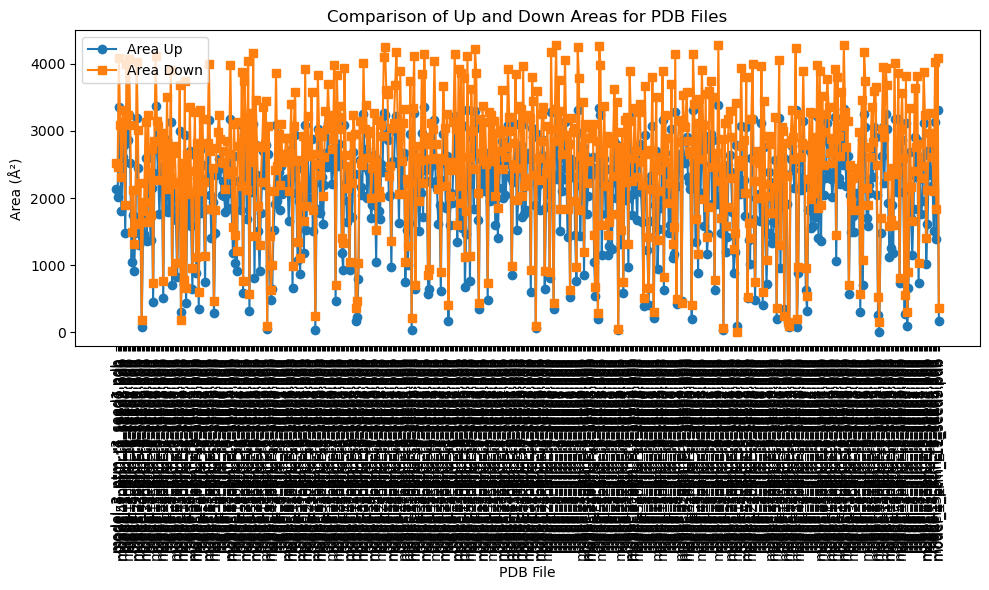

In [27]:
# Extract data for plotting
pdb_files = [result['pdb_file'] for result in results]
area_up_values = [result['area_up'] for result in results]
area_down_values = [result['area_down'] for result in results]

# Plot the areas
plt.figure(figsize=(10, 6))
plt.plot(pdb_files, area_up_values, label='Area Up', marker='o')
plt.plot(pdb_files, area_down_values, label='Area Down', marker='s')

# Formatting the plot
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.xlabel('PDB File')
plt.ylabel('Area (Å²)')
plt.title('Comparison of Up and Down Areas for PDB Files')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


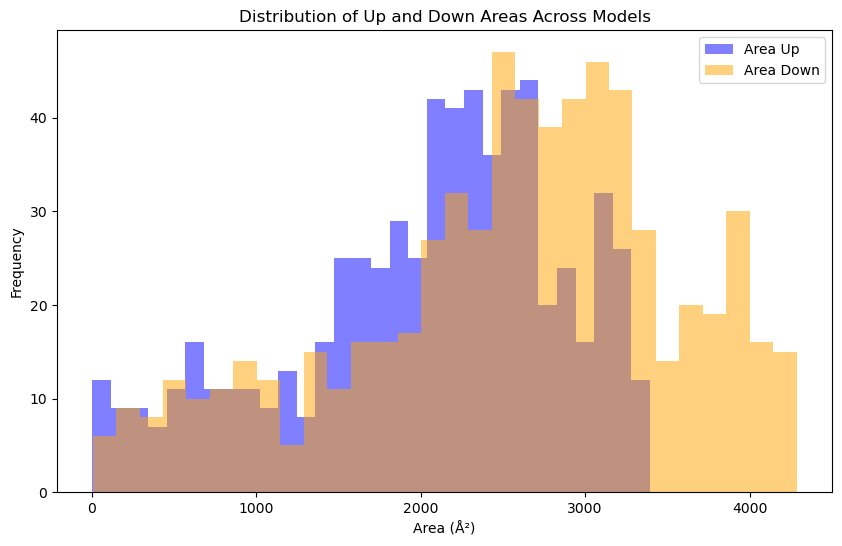

In [28]:
import matplotlib.pyplot as plt

# Extract data for plotting
area_up_values = [result['area_up'] for result in results]
area_down_values = [result['area_down'] for result in results]

# Plotting the histogram for both distributions
plt.figure(figsize=(10, 6))

# Up area distribution
plt.hist(area_up_values, bins=30, alpha=0.5, label='Area Up', color='blue')

# Down area distribution
plt.hist(area_down_values, bins=30, alpha=0.5, label='Area Down', color='orange')

# Formatting the plot
plt.xlabel('Area (Å²)')
plt.ylabel('Frequency')
plt.title('Distribution of Up and Down Areas Across Models')
plt.legend(loc='upper right')

# Show the plot
plt.show()



Residue pairs and coordinates:
ASP108 (CA: (23.219, -46.719, 10.383)) to ASN439 (CA: (36.281, 26.812, 5.883)): Distance = 74.82 Å
ASN439 (CA: (36.281, 26.812, 5.883)) to PHE817 (CA: (-3.74, 16.984, -38.125)): Distance = 60.29 Å
PHE817 (CA: (-3.74, 16.984, -38.125)) to LEU1155 (CA: (-3.836, -36.25, -25.938)): Distance = 54.61 Å
LEU1155 (CA: (-3.836, -36.25, -25.938)) to ASP108 (CA: (23.219, -46.719, 10.383)): Distance = 46.48 Å

Area formed by the residues: 2127.83 square Å

Residue pairs and coordinates:
ILE68 (CA: (3.43, -33.562, 37.25)) to TYR465 (CA: (17.922, 29.688, 40.188)): Distance = 64.96 Å
TYR465 (CA: (17.922, 29.688, 40.188)) to ILE841 (CA: (-22.0, 38.938, -16.562)): Distance = 70.00 Å
ILE841 (CA: (-22.0, 38.938, -16.562)) to TYR1129 (CA: (-30.031, -32.125, -4.676)): Distance = 72.50 Å
TYR1129 (CA: (-30.031, -32.125, -4.676)) to ILE68 (CA: (3.43, -33.562, 37.25)): Distance = 53.66 Å

Area formed by the residues: 2524.25 square Å

Residue pairs and coordinates:
ASP108 (CA: (-


Residue pairs and coordinates:
ASP108 (CA: (-7.801, -47.438, -22.031)) to ASN439 (CA: (45.625, 0.907, -3.697)): Distance = 74.35 Å
ASN439 (CA: (45.625, 0.907, -3.697)) to PHE817 (CA: (0.513, 36.938, -20.516)): Distance = 60.13 Å
PHE817 (CA: (0.513, 36.938, -20.516)) to LEU1155 (CA: (-30.75, -6.621, -30.688)): Distance = 54.57 Å
LEU1155 (CA: (-30.75, -6.621, -30.688)) to ASP108 (CA: (-7.801, -47.438, -22.031)): Distance = 47.62 Å

Area formed by the residues: 3190.81 square Å

Residue pairs and coordinates:
ILE68 (CA: (-9.273, -47.25, 13.734)) to TYR465 (CA: (40.188, -10.93, 33.219)): Distance = 64.38 Å
TYR465 (CA: (40.188, -10.93, 33.219)) to ILE841 (CA: (2.564, 49.375, 11.219)): Distance = 74.41 Å
ILE841 (CA: (2.564, 49.375, 11.219)) to TYR1129 (CA: (-42.812, -7.512, 0.719)): Distance = 73.52 Å
TYR1129 (CA: (-42.812, -7.512, 0.719)) to ILE68 (CA: (-9.273, -47.25, 13.734)): Distance = 53.60 Å

Area formed by the residues: 4030.17 square Å

Residue pairs and coordinates:
ASP108 (CA: (2


Residue pairs and coordinates:
ASP108 (CA: (-10.875, -50.75, -19.172)) to ASN439 (CA: (44.719, -5.371, 10.5)): Distance = 77.66 Å
ASN439 (CA: (44.719, -5.371, 10.5)) to PHE817 (CA: (12.227, 32.625, -24.234)): Distance = 60.88 Å
PHE817 (CA: (12.227, 32.625, -24.234)) to LEU1155 (CA: (-20.984, -7.371, -40.125)): Distance = 54.36 Å
LEU1155 (CA: (-20.984, -7.371, -40.125)) to ASP108 (CA: (-10.875, -50.75, -19.172)): Distance = 49.22 Å

Area formed by the residues: 2715.89 square Å

Residue pairs and coordinates:
ILE68 (CA: (-22.219, -41.812, 12.688)) to TYR465 (CA: (26.562, -10.508, 44.75)): Distance = 66.24 Å
TYR465 (CA: (26.562, -10.508, 44.75)) to ILE841 (CA: (10.906, 48.219, 7.93)): Distance = 71.06 Å
ILE841 (CA: (10.906, 48.219, 7.93)) to TYR1129 (CA: (-40.969, -4.004, -13.32)): Distance = 76.61 Å
TYR1129 (CA: (-40.969, -4.004, -13.32)) to ILE68 (CA: (-22.219, -41.812, 12.688)): Distance = 49.57 Å

Area formed by the residues: 3147.66 square Å

Residue pairs and coordinates:
ASP108 (


Residue pairs and coordinates:
ASP108 (CA: (-33.281, -25.188, -34.875)) to ASN439 (CA: (-25.422, -7.715, 37.219)): Distance = 74.60 Å
ASN439 (CA: (-25.422, -7.715, 37.219)) to PHE817 (CA: (30.734, -21.25, 21.969)): Distance = 59.74 Å
PHE817 (CA: (30.734, -21.25, 21.969)) to LEU1155 (CA: (15.242, -31.016, -29.062)): Distance = 54.22 Å
LEU1155 (CA: (15.242, -31.016, -29.062)) to ASP108 (CA: (-33.281, -25.188, -34.875)): Distance = 49.22 Å

Area formed by the residues: 825.87 square Å

Residue pairs and coordinates:
ILE68 (CA: (-32.906, 9.914, -36.156)) to TYR465 (CA: (-34.844, 28.984, 26.406)): Distance = 65.43 Å
TYR465 (CA: (-34.844, 28.984, 26.406)) to ILE841 (CA: (36.531, 12.227, 31.5)): Distance = 73.49 Å
ILE841 (CA: (36.531, 12.227, 31.5)) to TYR1129 (CA: (19.812, 1.029, -39.25)): Distance = 73.56 Å
TYR1129 (CA: (19.812, 1.029, -39.25)) to ILE68 (CA: (-32.906, 9.914, -36.156)): Distance = 53.55 Å

Area formed by the residues: 1033.77 square Å

Residue pairs and coordinates:
ASP108 


Residue pairs and coordinates:
ASP108 (CA: (37.438, -32.469, 19.484)) to ASN439 (CA: (26.391, 35.188, -10.703)): Distance = 74.91 Å
ASN439 (CA: (26.391, 35.188, -10.703)) to PHE817 (CA: (-11.953, -0.04, -40.594)): Distance = 60.04 Å
PHE817 (CA: (-11.953, -0.04, -40.594)) to LEU1155 (CA: (4.051, -43.0, -11.266)): Distance = 54.42 Å
LEU1155 (CA: (4.051, -43.0, -11.266)) to ASP108 (CA: (37.438, -32.469, 19.484)): Distance = 46.60 Å

Area formed by the residues: 2293.12 square Å

Residue pairs and coordinates:
ILE68 (CA: (17.781, -16.297, 44.219)) to TYR465 (CA: (11.648, 46.219, 23.812)): Distance = 66.05 Å
TYR465 (CA: (11.648, 46.219, 23.812)) to ILE841 (CA: (-35.125, 21.969, -25.922)): Distance = 72.45 Å
ILE841 (CA: (-35.125, 21.969, -25.922)) to TYR1129 (CA: (-19.641, -37.594, 12.094)): Distance = 72.34 Å
TYR1129 (CA: (-19.641, -37.594, 12.094)) to ILE68 (CA: (17.781, -16.297, 44.219)): Distance = 53.72 Å

Area formed by the residues: 2815.76 square Å

Residue pairs and coordinates:
AS


Residue pairs and coordinates:
ASP108 (CA: (-21.516, -11.844, -49.0)) to ASN439 (CA: (40.969, -13.375, -8.43)): Distance = 74.52 Å
ASN439 (CA: (40.969, -13.375, -8.43)) to PHE817 (CA: (18.734, 39.75, 7.637)): Distance = 59.79 Å
PHE817 (CA: (18.734, 39.75, 7.637)) to LEU1155 (CA: (-22.625, 33.094, -26.578)): Distance = 54.09 Å
LEU1155 (CA: (-22.625, 33.094, -26.578)) to ASP108 (CA: (-21.516, -11.844, -49.0)): Distance = 50.23 Å

Area formed by the residues: 2575.72 square Å

Residue pairs and coordinates:
ILE68 (CA: (-31.484, -30.719, -20.641)) to TYR465 (CA: (23.109, -41.969, 11.578)): Distance = 64.38 Å
TYR465 (CA: (23.109, -41.969, 11.578)) to ILE841 (CA: (17.422, 23.594, 39.594)): Distance = 71.52 Å
ILE841 (CA: (17.422, 23.594, 39.594)) to TYR1129 (CA: (-41.906, 18.359, -3.326)): Distance = 73.41 Å
TYR1129 (CA: (-41.906, 18.359, -3.326)) to ILE68 (CA: (-31.484, -30.719, -20.641)): Distance = 53.08 Å

Area formed by the residues: 3240.78 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ILE68 (CA: (18.969, -10.844, 44.656)) to TYR465 (CA: (5.41, 48.656, 18.734)): Distance = 66.30 Å
TYR465 (CA: (5.41, 48.656, 18.734)) to ILE841 (CA: (-38.188, 15.586, -26.562)): Distance = 71.04 Å
ILE841 (CA: (-38.188, 15.586, -26.562)) to TYR1129 (CA: (-14.859, -39.062, 15.828)): Distance = 72.99 Å
TYR1129 (CA: (-14.859, -39.062, 15.828)) to ILE68 (CA: (18.969, -10.844, 44.656)): Distance = 52.65 Å

Area formed by the residues: 2774.70 square Å

Residue pairs and coordinates:
ASP108 (CA: (46.094, -17.484, 24.047)) to ASN439 (CA: (19.422, 12.102, -38.719)): Distance = 74.34 Å
ASN439 (CA: (19.422, 12.102, -38.719)) to PHE817 (CA: (-24.953, -24.734, -24.344)): Distance = 59.44 Å
PHE817 (CA: (-24.953, -24.734, -24.344)) to LEU1155 (CA: (3.279, -41.031, 20.672)): Distance = 55.58 Å
LEU1155 (CA: (3.279, -41.031, 20.672)) to ASP108 (CA: (46.094, -17.484, 24.047)): Distance = 48.98 Å

Area formed by the residues: 1828.95 square Å

Residue pairs and coordinates:



Residue pairs and coordinates:
ASP108 (CA: (48.281, -16.141, 19.641)) to ASN439 (CA: (14.07, 9.125, -42.688)): Distance = 75.46 Å
ASN439 (CA: (14.07, 9.125, -42.688)) to PHE817 (CA: (-27.406, -26.219, -20.047)): Distance = 59.01 Å
PHE817 (CA: (-27.406, -26.219, -20.047)) to LEU1155 (CA: (5.883, -38.875, 21.844)): Distance = 54.98 Å
LEU1155 (CA: (5.883, -38.875, 21.844)) to ASP108 (CA: (48.281, -16.141, 19.641)): Distance = 48.16 Å

Area formed by the residues: 1775.23 square Å

Residue pairs and coordinates:
ILE68 (CA: (37.031, 15.852, 29.25)) to TYR465 (CA: (13.266, 44.281, -26.094)): Distance = 66.60 Å
TYR465 (CA: (13.266, 44.281, -26.094)) to ILE841 (CA: (-43.312, 4.703, -18.641)): Distance = 69.45 Å
ILE841 (CA: (-43.312, 4.703, -18.641)) to TYR1129 (CA: (-5.75, -14.172, 41.125)): Distance = 73.07 Å
TYR1129 (CA: (-5.75, -14.172, 41.125)) to ILE68 (CA: (37.031, 15.852, 29.25)): Distance = 53.60 Å

Area formed by the residues: 2242.14 square Å

Residue pairs and coordinates:
ASP108 (


Residue pairs and coordinates:
ASP108 (CA: (-26.375, 39.281, -22.281)) to ASN439 (CA: (-36.375, -24.312, 15.5)): Distance = 74.64 Å
ASN439 (CA: (-36.375, -24.312, 15.5)) to PHE817 (CA: (11.586, -37.406, -18.016)): Distance = 59.96 Å
PHE817 (CA: (11.586, -37.406, -18.016)) to LEU1155 (CA: (9.852, 12.758, -39.719)): Distance = 54.69 Å
LEU1155 (CA: (9.852, 12.758, -39.719)) to ASP108 (CA: (-26.375, 39.281, -22.281)): Distance = 48.17 Å

Area formed by the residues: 2476.11 square Å

Residue pairs and coordinates:
ILE68 (CA: (-11.992, 47.031, 8.352)) to TYR465 (CA: (-26.391, -4.18, 47.531)): Distance = 66.07 Å
TYR465 (CA: (-26.391, -4.18, 47.531)) to ILE841 (CA: (27.812, -41.688, 13.102)): Distance = 74.37 Å
ILE841 (CA: (27.812, -41.688, 13.102)) to TYR1129 (CA: (29.969, 26.156, -16.156)): Distance = 73.92 Å
TYR1129 (CA: (29.969, 26.156, -16.156)) to ILE68 (CA: (-11.992, 47.031, 8.352)): Distance = 52.89 Å

Area formed by the residues: 3103.85 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ILE68 (CA: (-2.33, -15.93, 46.531)) to TYR465 (CA: (44.188, 23.422, 18.75)): Distance = 66.96 Å
TYR465 (CA: (44.188, 23.422, 18.75)) to ILE841 (CA: (-1.054, 35.625, -30.906)): Distance = 68.27 Å
ILE841 (CA: (-1.054, 35.625, -30.906)) to TYR1129 (CA: (-41.219, -7.855, 11.273)): Distance = 72.68 Å
TYR1129 (CA: (-41.219, -7.855, 11.273)) to ILE68 (CA: (-2.33, -15.93, 46.531)): Distance = 53.11 Å

Area formed by the residues: 2181.62 square Å

Residue pairs and coordinates:
ASP108 (CA: (27.578, -43.938, 11.539)) to ASN439 (CA: (34.312, 29.172, -2.178)): Distance = 74.69 Å
ASN439 (CA: (34.312, 29.172, -2.178)) to PHE817 (CA: (-10.117, 13.336, -38.875)): Distance = 59.76 Å
PHE817 (CA: (-10.117, 13.336, -38.875)) to LEU1155 (CA: (-5.816, -38.75, -20.516)): Distance = 55.39 Å
LEU1155 (CA: (-5.816, -38.75, -20.516)) to ASP108 (CA: (27.578, -43.938, 11.539)): Distance = 46.58 Å

Area formed by the residues: 2429.31 square Å

Residue pairs and coordinates:
ILE68 (C


Residue pairs and coordinates:
ILE68 (CA: (35.781, 24.484, 24.703)) to TYR465 (CA: (6.047, 42.062, -30.562)): Distance = 65.17 Å
TYR465 (CA: (6.047, 42.062, -30.562)) to ILE841 (CA: (-44.0, -4.297, -14.562)): Distance = 70.07 Å
ILE841 (CA: (-44.0, -4.297, -14.562)) to TYR1129 (CA: (-0.815, -11.367, 43.344)): Distance = 72.58 Å
TYR1129 (CA: (-0.815, -11.367, 43.344)) to ILE68 (CA: (35.781, 24.484, 24.703)): Distance = 54.52 Å

Area formed by the residues: 2032.56 square Å

Residue pairs and coordinates:
ASP108 (CA: (-33.719, -23.625, -36.438)) to ASN439 (CA: (16.016, -39.688, 17.219)): Distance = 74.90 Å
ASN439 (CA: (16.016, -39.688, 17.219)) to PHE817 (CA: (41.969, 7.996, -6.824)): Distance = 59.37 Å
PHE817 (CA: (41.969, 7.996, -6.824)) to LEU1155 (CA: (2.322, 12.523, -43.594)): Distance = 54.26 Å
LEU1155 (CA: (2.322, 12.523, -43.594)) to ASP108 (CA: (-33.719, -23.625, -36.438)): Distance = 51.54 Å

Area formed by the residues: 2192.38 square Å

Residue pairs and coordinates:
ILE68 (C


Residue pairs and coordinates:
ASP108 (CA: (-19.078, -52.594, 1.07)) to ASN439 (CA: (-26.719, 14.242, 33.875)): Distance = 74.84 Å
ASN439 (CA: (-26.719, 14.242, 33.875)) to PHE817 (CA: (32.125, 12.977, 24.906)): Distance = 59.54 Å
PHE817 (CA: (32.125, 12.977, 24.906)) to LEU1155 (CA: (27.969, -36.625, 2.566)): Distance = 54.56 Å
LEU1155 (CA: (27.969, -36.625, 2.566)) to ASP108 (CA: (-19.078, -52.594, 1.07)): Distance = 49.71 Å

Area formed by the residues: 3095.24 square Å

Residue pairs and coordinates:
ILE68 (CA: (-29.531, -32.531, -25.328)) to TYR465 (CA: (-45.438, 25.375, 1.444)): Distance = 65.75 Å
TYR465 (CA: (-45.438, 25.375, 1.444)) to ILE841 (CA: (25.672, 41.781, 4.723)): Distance = 73.05 Å
ILE841 (CA: (25.672, 41.781, 4.723)) to TYR1129 (CA: (23.766, -24.172, -28.625)): Distance = 73.93 Å
TYR1129 (CA: (23.766, -24.172, -28.625)) to ILE68 (CA: (-29.531, -32.531, -25.328)): Distance = 54.05 Å

Area formed by the residues: 3938.92 square Å

Residue pairs and coordinates:
ASP108


Residue pairs and coordinates:
ILE68 (CA: (-46.469, 5.379, -16.5)) to TYR465 (CA: (-24.406, -36.25, 29.797)): Distance = 66.05 Å
TYR465 (CA: (-24.406, -36.25, 29.797)) to ILE841 (CA: (31.391, 4.902, 34.375)): Distance = 69.48 Å
ILE841 (CA: (31.391, 4.902, 34.375)) to TYR1129 (CA: (-5.555, 41.375, -15.633)): Distance = 72.08 Å
TYR1129 (CA: (-5.555, 41.375, -15.633)) to ILE68 (CA: (-46.469, 5.379, -16.5)): Distance = 54.50 Å

Area formed by the residues: 3026.44 square Å

Residue pairs and coordinates:
ASP108 (CA: (-13.633, -46.0, -20.875)) to ASN439 (CA: (44.219, -8.992, 8.0)): Distance = 74.50 Å
ASN439 (CA: (44.219, -8.992, 8.0)) to PHE817 (CA: (14.328, 33.656, -21.266)): Distance = 59.74 Å
PHE817 (CA: (14.328, 33.656, -21.266)) to LEU1155 (CA: (-22.422, -3.912, -37.312)): Distance = 54.95 Å
LEU1155 (CA: (-22.422, -3.912, -37.312)) to ASP108 (CA: (-13.633, -46.0, -20.875)): Distance = 46.03 Å

Area formed by the residues: 2725.20 square Å

Residue pairs and coordinates:
ILE68 (CA: (-2


Residue pairs and coordinates:
ILE68 (CA: (10.562, -38.719, 29.766)) to TYR465 (CA: (33.969, 22.203, 34.375)): Distance = 65.43 Å
TYR465 (CA: (33.969, 22.203, 34.375)) to ILE841 (CA: (-21.516, 43.406, -4.379)): Distance = 70.92 Å
ILE841 (CA: (-21.516, 43.406, -4.379)) to TYR1129 (CA: (-34.25, -28.422, 1.827)): Distance = 73.21 Å
TYR1129 (CA: (-34.25, -28.422, 1.827)) to ILE68 (CA: (10.562, -38.719, 29.766)): Distance = 53.80 Å

Area formed by the residues: 3613.22 square Å

Residue pairs and coordinates:
ASP108 (CA: (3.758, -52.312, -7.855)) to ASN439 (CA: (44.969, 8.75, 2.502)): Distance = 74.39 Å
ASN439 (CA: (44.969, 8.75, 2.502)) to PHE817 (CA: (-1.143, 29.812, -29.828)): Distance = 60.13 Å
PHE817 (CA: (-1.143, 29.812, -29.828)) to LEU1155 (CA: (-23.094, -20.047, -31.672)): Distance = 54.51 Å
LEU1155 (CA: (-23.094, -20.047, -31.672)) to ASP108 (CA: (3.758, -52.312, -7.855)): Distance = 48.26 Å

Area formed by the residues: 2865.37 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ILE68 (CA: (-32.406, 6.227, -37.125)) to TYR465 (CA: (-35.062, 29.234, 24.922)): Distance = 66.23 Å
TYR465 (CA: (-35.062, 29.234, 24.922)) to ILE841 (CA: (36.375, 14.859, 31.891)): Distance = 73.20 Å
ILE841 (CA: (36.375, 14.859, 31.891)) to TYR1129 (CA: (20.109, -1.059, -39.344)): Distance = 74.78 Å
TYR1129 (CA: (20.109, -1.059, -39.344)) to ILE68 (CA: (-32.406, 6.227, -37.125)): Distance = 53.06 Å

Area formed by the residues: 1279.91 square Å

Residue pairs and coordinates:
ASP108 (CA: (-2.215, -10.234, -54.094)) to ASN439 (CA: (41.281, -16.844, 5.195)): Distance = 73.83 Å
ASN439 (CA: (41.281, -16.844, 5.195)) to PHE817 (CA: (14.719, 35.312, 16.016)): Distance = 59.52 Å
PHE817 (CA: (14.719, 35.312, 16.016)) to LEU1155 (CA: (-12.602, 30.078, -31.094)): Distance = 54.71 Å
LEU1155 (CA: (-12.602, 30.078, -31.094)) to ASP108 (CA: (-2.215, -10.234, -54.094)): Distance = 47.56 Å

Area formed by the residues: 1624.37 square Å

Residue pairs and coordinates:
IL


Residue pairs and coordinates:
ASP108 (CA: (7.18, 10.125, 53.5)) to ASN439 (CA: (-44.188, 11.328, -0.304)): Distance = 74.40 Å
ASN439 (CA: (-44.188, 11.328, -0.304)) to PHE817 (CA: (5.203, 26.297, -31.281)): Distance = 60.19 Å
PHE817 (CA: (5.203, 26.297, -31.281)) to LEU1155 (CA: (34.875, 22.906, 14.758)): Distance = 54.88 Å
LEU1155 (CA: (34.875, 22.906, 14.758)) to ASP108 (CA: (7.18, 10.125, 53.5)): Distance = 49.31 Å

Area formed by the residues: 650.75 square Å

Residue pairs and coordinates:
ILE68 (CA: (2.984, -24.359, 44.906)) to TYR465 (CA: (-45.688, -28.047, 3.881)): Distance = 63.76 Å
TYR465 (CA: (-45.688, -28.047, 3.881)) to ILE841 (CA: (-2.947, -3.977, -47.5)): Distance = 71.04 Å
ILE841 (CA: (-2.947, -3.977, -47.5)) to TYR1129 (CA: (41.594, -9.984, 10.961)): Distance = 73.74 Å
TYR1129 (CA: (41.594, -9.984, 10.961)) to ILE68 (CA: (2.984, -24.359, 44.906)): Distance = 53.38 Å

Area formed by the residues: 943.06 square Å

Residue pairs and coordinates:
ASP108 (CA: (14.602, -50


Residue pairs and coordinates:
ASP108 (CA: (45.531, 7.594, 28.859)) to ASN439 (CA: (2.158, 36.312, -25.5)): Distance = 75.24 Å
ASN439 (CA: (2.158, 36.312, -25.5)) to PHE817 (CA: (-1.658, -23.281, -35.469)): Distance = 60.54 Å
PHE817 (CA: (-1.658, -23.281, -35.469)) to LEU1155 (CA: (32.656, -31.891, 6.398)): Distance = 54.81 Å
LEU1155 (CA: (32.656, -31.891, 6.398)) to ASP108 (CA: (45.531, 7.594, 28.859)): Distance = 47.22 Å

Area formed by the residues: 2080.03 square Å

Residue pairs and coordinates:
ILE68 (CA: (14.953, 14.219, 45.375)) to TYR465 (CA: (-22.625, 46.438, 3.23)): Distance = 65.01 Å
TYR465 (CA: (-22.625, 46.438, 3.23)) to ILE841 (CA: (-35.5, -18.406, -28.047)): Distance = 73.14 Å
ILE841 (CA: (-35.5, -18.406, -28.047)) to TYR1129 (CA: (7.391, -34.469, 28.25)): Distance = 72.57 Å
TYR1129 (CA: (7.391, -34.469, 28.25)) to ILE68 (CA: (14.953, 14.219, 45.375)): Distance = 52.16 Å

Area formed by the residues: 2530.64 square Å

Residue pairs and coordinates:
ASP108 (CA: (1.397, 


Residue pairs and coordinates:
ILE68 (CA: (32.625, -4.055, 35.406)) to TYR465 (CA: (9.289, 52.344, 9.227)): Distance = 66.41 Å
TYR465 (CA: (9.289, 52.344, 9.227)) to ILE841 (CA: (-45.406, 15.188, -14.273)): Distance = 70.17 Å
ILE841 (CA: (-45.406, 15.188, -14.273)) to TYR1129 (CA: (-7.828, -36.438, 20.625)): Distance = 72.77 Å
TYR1129 (CA: (-7.828, -36.438, 20.625)) to ILE68 (CA: (32.625, -4.055, 35.406)): Distance = 53.88 Å

Area formed by the residues: 3628.57 square Å

Residue pairs and coordinates:
ASP108 (CA: (49.219, -14.141, 13.789)) to ASN439 (CA: (10.68, 40.094, -18.703)): Distance = 74.04 Å
ASN439 (CA: (10.68, 40.094, -18.703)) to PHE817 (CA: (-17.266, -9.125, -41.312)): Distance = 60.95 Å
PHE817 (CA: (-17.266, -9.125, -41.312)) to LEU1155 (CA: (18.656, -40.5, -13.172)): Distance = 55.38 Å
LEU1155 (CA: (18.656, -40.5, -13.172)) to ASP108 (CA: (49.219, -14.141, 13.789)): Distance = 48.54 Å

Area formed by the residues: 2659.14 square Å

Residue pairs and coordinates:
ILE68 (C


Residue pairs and coordinates:
ASP108 (CA: (-12.852, 7.543, -52.812)) to ASN439 (CA: (-7.984, -45.094, 1.511)): Distance = 75.80 Å
ASN439 (CA: (-7.984, -45.094, 1.511)) to PHE817 (CA: (38.906, -12.773, 14.82)): Distance = 58.48 Å
PHE817 (CA: (38.906, -12.773, 14.82)) to LEU1155 (CA: (28.266, 20.781, -28.438)): Distance = 55.77 Å
LEU1155 (CA: (28.266, 20.781, -28.438)) to ASP108 (CA: (-12.852, 7.543, -52.812)): Distance = 49.60 Å

Area formed by the residues: 2073.01 square Å

Residue pairs and coordinates:
ILE68 (CA: (-34.781, 19.172, -28.828)) to TYR465 (CA: (-41.0, -30.109, 15.078)): Distance = 66.30 Å
TYR465 (CA: (-41.0, -30.109, 15.078)) to ILE841 (CA: (17.469, -8.375, 42.875)): Distance = 68.29 Å
ILE841 (CA: (17.469, -8.375, 42.875)) to TYR1129 (CA: (9.5, 41.188, -10.078)): Distance = 72.97 Å
TYR1129 (CA: (9.5, 41.188, -10.078)) to ILE68 (CA: (-34.781, 19.172, -28.828)): Distance = 52.89 Å

Area formed by the residues: 2558.20 square Å

Residue pairs and coordinates:
ASP108 (CA: 


Residue pairs and coordinates:
ILE68 (CA: (-4.781, -47.875, 10.445)) to TYR465 (CA: (18.422, -0.166, 44.938)): Distance = 63.28 Å
TYR465 (CA: (18.422, -0.166, 44.938)) to ILE841 (CA: (-13.398, 44.062, 4.918)): Distance = 67.60 Å
ILE841 (CA: (-13.398, 44.062, 4.918)) to TYR1129 (CA: (-34.312, -21.0, -21.859)): Distance = 73.40 Å
TYR1129 (CA: (-34.312, -21.0, -21.859)) to ILE68 (CA: (-4.781, -47.875, 10.445)): Distance = 51.36 Å

Area formed by the residues: 2513.87 square Å

Residue pairs and coordinates:
ASP108 (CA: (-39.344, -20.281, -30.969)) to ASN439 (CA: (16.109, -39.812, 15.047)): Distance = 74.66 Å
ASN439 (CA: (16.109, -39.812, 15.047)) to PHE817 (CA: (40.844, 5.367, -12.883)): Distance = 58.59 Å
PHE817 (CA: (40.844, 5.367, -12.883)) to LEU1155 (CA: (-3.959, 12.156, -43.781)): Distance = 54.85 Å
LEU1155 (CA: (-3.959, 12.156, -43.781)) to ASP108 (CA: (-39.344, -20.281, -30.969)): Distance = 49.68 Å

Area formed by the residues: 2340.96 square Å

Residue pairs and coordinates:
IL


Residue pairs and coordinates:
ILE68 (CA: (12.32, 24.891, 40.875)) to TYR465 (CA: (-22.141, 48.625, -9.789)): Distance = 65.71 Å
TYR465 (CA: (-22.141, 48.625, -9.789)) to ILE841 (CA: (-35.062, -17.516, -28.141)): Distance = 69.85 Å
ILE841 (CA: (-35.062, -17.516, -28.141)) to TYR1129 (CA: (3.746, -27.422, 32.188)): Distance = 72.41 Å
TYR1129 (CA: (3.746, -27.422, 32.188)) to ILE68 (CA: (12.32, 24.891, 40.875)): Distance = 53.72 Å

Area formed by the residues: 2350.52 square Å

Residue pairs and coordinates:
ASP108 (CA: (1.303, 22.938, 49.062)) to ASN439 (CA: (-46.031, -0.391, -2.951)): Distance = 74.10 Å
ASN439 (CA: (-46.031, -0.391, -2.951)) to PHE817 (CA: (-1.065, 19.984, -37.188)): Distance = 60.08 Å
PHE817 (CA: (-1.065, 19.984, -37.188)) to LEU1155 (CA: (27.5, 34.25, 8.055)): Distance = 55.38 Å
LEU1155 (CA: (27.5, 34.25, 8.055)) to ASP108 (CA: (1.303, 22.938, 49.062)): Distance = 49.96 Å

Area formed by the residues: 67.59 square Å

Residue pairs and coordinates:
ILE68 (CA: (7.77, 


Residue pairs and coordinates:
ILE68 (CA: (-25.625, -44.625, -5.969)) to TYR465 (CA: (-49.781, 17.594, -2.98)): Distance = 66.81 Å
TYR465 (CA: (-49.781, 17.594, -2.98)) to ILE841 (CA: (18.359, 41.844, -17.062)): Distance = 73.68 Å
ILE841 (CA: (18.359, 41.844, -17.062)) to TYR1129 (CA: (24.172, -31.953, -20.375)): Distance = 74.10 Å
TYR1129 (CA: (24.172, -31.953, -20.375)) to ILE68 (CA: (-25.625, -44.625, -5.969)): Distance = 53.37 Å

Area formed by the residues: 4286.96 square Å

Residue pairs and coordinates:
ASP108 (CA: (-27.125, 43.156, -12.312)) to ASN439 (CA: (-35.25, -25.0, 15.961)): Distance = 74.23 Å
ASN439 (CA: (-35.25, -25.0, 15.961)) to PHE817 (CA: (5.809, -34.25, -25.547)): Distance = 59.11 Å
PHE817 (CA: (5.809, -34.25, -25.547)) to LEU1155 (CA: (5.34, 18.672, -38.688)): Distance = 54.53 Å
LEU1155 (CA: (5.34, 18.672, -38.688)) to ASP108 (CA: (-27.125, 43.156, -12.312)): Distance = 48.47 Å

Area formed by the residues: 2290.10 square Å

Residue pairs and coordinates:
ILE68 


Residue pairs and coordinates:
ILE68 (CA: (17.578, -42.0, 17.797)) to TYR465 (CA: (41.969, 17.281, 21.953)): Distance = 64.24 Å
TYR465 (CA: (41.969, 17.281, 21.953)) to ILE841 (CA: (-26.0, 42.812, 1.532)): Distance = 75.42 Å
ILE841 (CA: (-26.0, 42.812, 1.532)) to TYR1129 (CA: (-34.281, -29.312, 5.953)): Distance = 72.73 Å
TYR1129 (CA: (-34.281, -29.312, 5.953)) to ILE68 (CA: (17.578, -42.0, 17.797)): Distance = 54.69 Å

Area formed by the residues: 4248.67 square Å

Residue pairs and coordinates:
ASP108 (CA: (15.203, -49.344, -9.984)) to ASN439 (CA: (40.219, 20.328, -2.34)): Distance = 74.42 Å
ASN439 (CA: (40.219, 20.328, -2.34)) to PHE817 (CA: (-12.508, 27.484, -29.719)): Distance = 59.84 Å
PHE817 (CA: (-12.508, 27.484, -29.719)) to LEU1155 (CA: (-20.141, -26.594, -30.047)): Distance = 54.62 Å
LEU1155 (CA: (-20.141, -26.594, -30.047)) to ASP108 (CA: (15.203, -49.344, -9.984)): Distance = 46.58 Å

Area formed by the residues: 2968.80 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ILE68 (CA: (17.359, -43.656, 9.75)) to TYR465 (CA: (45.656, 14.438, 22.453)): Distance = 65.86 Å
TYR465 (CA: (45.656, 14.438, 22.453)) to ILE841 (CA: (-19.609, 44.562, 16.547)): Distance = 72.12 Å
ILE841 (CA: (-19.609, 44.562, 16.547)) to TYR1129 (CA: (-34.281, -25.75, 5.555)): Distance = 72.66 Å
TYR1129 (CA: (-34.281, -25.75, 5.555)) to ILE68 (CA: (17.359, -43.656, 9.75)): Distance = 54.82 Å

Area formed by the residues: 4268.78 square Å

Residue pairs and coordinates:
ASP108 (CA: (25.953, -46.5, -8.695)) to ASN439 (CA: (28.906, 27.109, -19.203)): Distance = 74.41 Å
ASN439 (CA: (28.906, 27.109, -19.203)) to PHE817 (CA: (-28.344, 14.859, -31.656)): Distance = 59.86 Å
PHE817 (CA: (-28.344, 14.859, -31.656)) to LEU1155 (CA: (-19.094, -37.75, -22.5)): Distance = 54.20 Å
LEU1155 (CA: (-19.094, -37.75, -22.5)) to ASP108 (CA: (25.953, -46.5, -8.695)): Distance = 47.92 Å

Area formed by the residues: 3233.44 square Å

Residue pairs and coordinates:
ILE68 (CA: (


Residue pairs and coordinates:
ASP108 (CA: (3.521, 41.0, 33.656)) to ASN439 (CA: (-45.625, -2.689, -1.061)): Distance = 74.36 Å
ASN439 (CA: (-45.625, -2.689, -1.061)) to PHE817 (CA: (-3.246, 1.01, -41.969)): Distance = 59.02 Å
PHE817 (CA: (-3.246, 1.01, -41.969)) to LEU1155 (CA: (26.047, 33.406, -8.867)): Distance = 54.80 Å
LEU1155 (CA: (26.047, 33.406, -8.867)) to ASP108 (CA: (3.521, 41.0, 33.656)): Distance = 48.72 Å

Area formed by the residues: 1310.95 square Å

Residue pairs and coordinates:
ILE68 (CA: (11.109, 9.727, 47.562)) to TYR465 (CA: (-37.25, -29.5, 26.266)): Distance = 65.81 Å
TYR465 (CA: (-37.25, -29.5, 26.266)) to ILE841 (CA: (-1.279, -34.281, -36.312)): Distance = 72.34 Å
ILE841 (CA: (-1.279, -34.281, -36.312)) to TYR1129 (CA: (42.125, 7.234, 5.926)): Distance = 73.43 Å
TYR1129 (CA: (42.125, 7.234, 5.926)) to ILE68 (CA: (11.109, 9.727, 47.562)): Distance = 51.98 Å

Area formed by the residues: 1519.04 square Å

Residue pairs and coordinates:
ASP108 (CA: (48.281, 16.98


Residue pairs and coordinates:
ASP108 (CA: (-23.125, 16.062, -47.219)) to ASN439 (CA: (38.344, -12.875, -18.156)): Distance = 73.89 Å
ASN439 (CA: (38.344, -12.875, -18.156)) to PHE817 (CA: (23.641, 27.875, 23.344)): Distance = 59.99 Å
PHE817 (CA: (23.641, 27.875, 23.344)) to LEU1155 (CA: (-19.031, 43.031, -6.707)): Distance = 54.35 Å
LEU1155 (CA: (-19.031, 43.031, -6.707)) to ASP108 (CA: (-23.125, 16.062, -47.219)): Distance = 48.84 Å

Area formed by the residues: 1646.14 square Å

Residue pairs and coordinates:
ILE68 (CA: (-35.219, -14.383, -32.875)) to TYR465 (CA: (18.031, -45.719, -11.305)): Distance = 65.44 Å
TYR465 (CA: (18.031, -45.719, -11.305)) to ILE841 (CA: (19.797, -1.562, 43.344)): Distance = 70.28 Å
ILE841 (CA: (19.797, -1.562, 43.344)) to TYR1129 (CA: (-39.688, 20.844, 8.734)): Distance = 72.38 Å
TYR1129 (CA: (-39.688, 20.844, 8.734)) to ILE68 (CA: (-35.219, -14.383, -32.875)): Distance = 54.70 Å

Area formed by the residues: 2201.02 square Å

Residue pairs and coordinat


Residue pairs and coordinates:
ASP108 (CA: (-35.719, -1.914, -38.844)) to ASN439 (CA: (-25.75, -20.453, 33.281)): Distance = 75.13 Å
ASN439 (CA: (-25.75, -20.453, 33.281)) to PHE817 (CA: (26.859, -34.062, 9.477)): Distance = 59.33 Å
PHE817 (CA: (26.859, -34.062, 9.477)) to LEU1155 (CA: (9.672, -18.422, -39.594)): Distance = 54.30 Å
LEU1155 (CA: (9.672, -18.422, -39.594)) to ASP108 (CA: (-35.719, -1.914, -38.844)): Distance = 48.31 Å

Area formed by the residues: 632.92 square Å

Residue pairs and coordinates:
ILE68 (CA: (-29.922, 29.078, -24.344)) to TYR465 (CA: (-28.906, 17.672, 41.594)): Distance = 66.92 Å
TYR465 (CA: (-28.906, 17.672, 41.594)) to ILE841 (CA: (38.562, -9.633, 33.0)): Distance = 73.29 Å
ILE841 (CA: (38.562, -9.633, 33.0)) to TYR1129 (CA: (20.344, 13.766, -35.219)): Distance = 74.39 Å
TYR1129 (CA: (20.344, 13.766, -35.219)) to ILE68 (CA: (-29.922, 29.078, -24.344)): Distance = 53.66 Å

Area formed by the residues: 819.51 square Å

Residue pairs and coordinates:
ASP108


Residue pairs and coordinates:
ASP108 (CA: (32.656, -40.125, 11.281)) to ASN439 (CA: (31.0, 32.094, -6.574)): Distance = 74.41 Å
ASN439 (CA: (31.0, 32.094, -6.574)) to PHE817 (CA: (-13.602, 8.484, -39.438)): Distance = 60.22 Å
PHE817 (CA: (-13.602, 8.484, -39.438)) to LEU1155 (CA: (-3.332, -40.906, -18.188)): Distance = 54.74 Å
LEU1155 (CA: (-3.332, -40.906, -18.188)) to ASP108 (CA: (32.656, -40.125, 11.281)): Distance = 46.52 Å

Area formed by the residues: 2522.84 square Å

Residue pairs and coordinates:
ILE68 (CA: (16.391, -26.484, 39.438)) to TYR465 (CA: (19.016, 39.406, 29.828)): Distance = 66.64 Å
TYR465 (CA: (19.016, 39.406, 29.828)) to ILE841 (CA: (-30.562, 32.25, -19.547)): Distance = 70.34 Å
ILE841 (CA: (-30.562, 32.25, -19.547)) to TYR1129 (CA: (-24.766, -36.281, 7.461)): Distance = 73.89 Å
TYR1129 (CA: (-24.766, -36.281, 7.461)) to ILE68 (CA: (16.391, -26.484, 39.438)): Distance = 53.03 Å

Area formed by the residues: 3062.61 square Å

Residue pairs and coordinates:
ASP108


Residue pairs and coordinates:
ASP108 (CA: (-36.156, 11.453, -37.438)) to ASN439 (CA: (-28.719, -20.938, 29.828)): Distance = 75.03 Å
ASN439 (CA: (-28.719, -20.938, 29.828)) to PHE817 (CA: (21.641, -38.25, 3.162)): Distance = 59.56 Å
PHE817 (CA: (21.641, -38.25, 3.162)) to LEU1155 (CA: (7.402, -11.617, -42.094)): Distance = 54.41 Å
LEU1155 (CA: (7.402, -11.617, -42.094)) to ASP108 (CA: (-36.156, 11.453, -37.438)): Distance = 49.51 Å

Area formed by the residues: 1167.02 square Å

Residue pairs and coordinates:
ILE68 (CA: (-25.062, 37.719, -17.422)) to TYR465 (CA: (-25.844, 15.852, 43.125)): Distance = 64.38 Å
TYR465 (CA: (-25.844, 15.852, 43.125)) to ILE841 (CA: (35.406, -18.859, 30.156)): Distance = 71.59 Å
ILE841 (CA: (35.406, -18.859, 30.156)) to TYR1129 (CA: (22.797, 17.234, -32.594)): Distance = 73.48 Å
TYR1129 (CA: (22.797, 17.234, -32.594)) to ILE68 (CA: (-25.062, 37.719, -17.422)): Distance = 54.22 Å

Area formed by the residues: 1417.79 square Å

Residue pairs and coordinates


Residue pairs and coordinates:
ASP108 (CA: (-13.992, -27.562, -46.844)) to ASN439 (CA: (40.625, -18.375, 3.906)): Distance = 75.12 Å
ASN439 (CA: (40.625, -18.375, 3.906)) to PHE817 (CA: (18.734, 37.375, -0.155)): Distance = 60.03 Å
PHE817 (CA: (18.734, 37.375, -0.155)) to LEU1155 (CA: (-16.375, 20.469, -37.688)): Distance = 54.10 Å
LEU1155 (CA: (-16.375, 20.469, -37.688)) to ASP108 (CA: (-13.992, -27.562, -46.844)): Distance = 48.95 Å

Area formed by the residues: 2486.31 square Å

Residue pairs and coordinates:
ILE68 (CA: (-28.125, -39.406, -16.812)) to TYR465 (CA: (18.672, -41.938, 25.891)): Distance = 63.40 Å
TYR465 (CA: (18.672, -41.938, 25.891)) to ILE841 (CA: (11.203, 32.188, 33.719)): Distance = 74.91 Å
ILE841 (CA: (11.203, 32.188, 33.719)) to TYR1129 (CA: (-40.125, 13.039, -15.125)): Distance = 73.40 Å
TYR1129 (CA: (-40.125, 13.039, -15.125)) to ILE68 (CA: (-28.125, -39.406, -16.812)): Distance = 53.83 Å

Area formed by the residues: 3185.82 square Å

Residue pairs and coordin


Residue pairs and coordinates:
ASP108 (CA: (-20.766, 43.469, -28.281)) to ASN439 (CA: (26.828, -13.938, -34.156)): Distance = 74.80 Å
ASN439 (CA: (26.828, -13.938, -34.156)) to PHE817 (CA: (35.375, 0.412, 22.422)): Distance = 58.99 Å
PHE817 (CA: (35.375, 0.412, 22.422)) to LEU1155 (CA: (0.23, 42.625, 16.594)): Distance = 55.24 Å
LEU1155 (CA: (0.23, 42.625, 16.594)) to ASP108 (CA: (-20.766, 43.469, -28.281)): Distance = 49.55 Å

Area formed by the residues: 1015.14 square Å

Residue pairs and coordinates:
ILE68 (CA: (-42.188, 16.062, -24.719)) to TYR465 (CA: (-4.961, -36.312, -38.031)): Distance = 65.62 Å
TYR465 (CA: (-4.961, -36.312, -38.031)) to ILE841 (CA: (20.609, -32.062, 26.531)): Distance = 69.57 Å
ILE841 (CA: (20.609, -32.062, 26.531)) to TYR1129 (CA: (-26.25, 24.5, 26.812)): Distance = 73.45 Å
TYR1129 (CA: (-26.25, 24.5, 26.812)) to ILE68 (CA: (-42.188, 16.062, -24.719)): Distance = 54.60 Å

Area formed by the residues: 1397.15 square Å

Residue pairs and coordinates:
ASP108 (


Residue pairs and coordinates:
ASP108 (CA: (-22.109, 27.812, -42.125)) to ASN439 (CA: (34.562, -16.609, -23.422)): Distance = 74.40 Å
ASN439 (CA: (34.562, -16.609, -23.422)) to PHE817 (CA: (29.484, 16.375, 26.078)): Distance = 59.70 Å
PHE817 (CA: (29.484, 16.375, 26.078)) to LEU1155 (CA: (-11.039, 44.781, 2.918)): Distance = 54.64 Å
LEU1155 (CA: (-11.039, 44.781, 2.918)) to ASP108 (CA: (-22.109, 27.812, -42.125)): Distance = 49.39 Å

Area formed by the residues: 1322.88 square Å

Residue pairs and coordinates:
ILE68 (CA: (-38.938, -1.359, -32.562)) to TYR465 (CA: (8.805, -45.875, -22.875)): Distance = 65.99 Å
TYR465 (CA: (8.805, -45.875, -22.875)) to ILE841 (CA: (19.797, -15.016, 40.094)): Distance = 70.98 Å
ILE841 (CA: (19.797, -15.016, 40.094)) to TYR1129 (CA: (-34.5, 24.703, 15.891)): Distance = 71.50 Å
TYR1129 (CA: (-34.5, 24.703, 15.891)) to ILE68 (CA: (-38.938, -1.359, -32.562)): Distance = 55.20 Å

Area formed by the residues: 1776.99 square Å

Residue pairs and coordinates:
AS


Residue pairs and coordinates:
ASP108 (CA: (-20.969, -49.031, 17.062)) to ASN439 (CA: (42.625, -16.391, -7.699)): Distance = 75.65 Å
ASN439 (CA: (42.625, -16.391, -7.699)) to PHE817 (CA: (2.602, 11.602, -40.188)): Distance = 58.66 Å
PHE817 (CA: (2.602, 11.602, -40.188)) to LEU1155 (CA: (-37.875, -17.766, -17.688)): Distance = 54.84 Å
LEU1155 (CA: (-37.875, -17.766, -17.688)) to ASP108 (CA: (-20.969, -49.031, 17.062)): Distance = 49.71 Å

Area formed by the residues: 2424.27 square Å

Residue pairs and coordinates:
ILE68 (CA: (-14.562, -25.25, 41.719)) to TYR465 (CA: (45.812, -1.543, 27.984)): Distance = 66.30 Å
TYR465 (CA: (45.812, -1.543, 27.984)) to ILE841 (CA: (14.641, 38.25, -19.719)): Distance = 69.50 Å
ILE841 (CA: (14.641, 38.25, -19.719)) to TYR1129 (CA: (-43.219, 4.434, 6.609)): Distance = 72.00 Å
TYR1129 (CA: (-43.219, 4.434, 6.609)) to ILE68 (CA: (-14.562, -25.25, 41.719)): Distance = 54.18 Å

Area formed by the residues: 2914.01 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ASP108 (CA: (10.789, -25.0, 49.094)) to ASN439 (CA: (-35.406, 23.031, 13.047)): Distance = 75.77 Å
ASN439 (CA: (-35.406, 23.031, 13.047)) to PHE817 (CA: (15.844, 33.906, -14.242)): Distance = 59.07 Å
PHE817 (CA: (15.844, 33.906, -14.242)) to LEU1155 (CA: (41.219, -3.221, 17.375)): Distance = 54.97 Å
LEU1155 (CA: (41.219, -3.221, 17.375)) to ASP108 (CA: (10.789, -25.0, 49.094)): Distance = 49.06 Å

Area formed by the residues: 2323.19 square Å

Residue pairs and coordinates:
ILE68 (CA: (-4.855, -45.406, 26.0)) to TYR465 (CA: (-51.875, -9.258, -1.734)): Distance = 65.47 Å
TYR465 (CA: (-51.875, -9.258, -1.734)) to ILE841 (CA: (-2.42, 20.656, -42.094)): Distance = 70.50 Å
ILE841 (CA: (-2.42, 20.656, -42.094)) to TYR1129 (CA: (35.406, -28.828, -4.004)): Distance = 73.01 Å
TYR1129 (CA: (35.406, -28.828, -4.004)) to ILE68 (CA: (-4.855, -45.406, 26.0)): Distance = 52.88 Å

Area formed by the residues: 2906.81 square Å

Residue pairs and coordinates:
ASP108 (CA: 


Residue pairs and coordinates:
ASP108 (CA: (-6.012, 27.297, -46.125)) to ASN439 (CA: (29.266, -31.703, -16.109)): Distance = 75.01 Å
ASN439 (CA: (29.266, -31.703, -16.109)) to PHE817 (CA: (28.859, 6.852, 30.062)): Distance = 60.15 Å
PHE817 (CA: (28.859, 6.852, 30.062)) to LEU1155 (CA: (3.873, 43.781, -1.5)): Distance = 54.63 Å
LEU1155 (CA: (3.873, 43.781, -1.5)) to ASP108 (CA: (-6.012, 27.297, -46.125)): Distance = 48.59 Å

Area formed by the residues: 1056.52 square Å

Residue pairs and coordinates:
ILE68 (CA: (-31.938, 5.469, -38.25)) to TYR465 (CA: (-5.613, -48.5, -20.234)): Distance = 62.69 Å
TYR465 (CA: (-5.613, -48.5, -20.234)) to ILE841 (CA: (9.977, -19.188, 44.625)): Distance = 72.86 Å
ILE841 (CA: (9.977, -19.188, 44.625)) to TYR1129 (CA: (-26.719, 33.312, 7.297)): Distance = 74.14 Å
TYR1129 (CA: (-26.719, 33.312, 7.297)) to ILE68 (CA: (-31.938, 5.469, -38.25)): Distance = 53.64 Å

Area formed by the residues: 1454.37 square Å

Residue pairs and coordinates:
ASP108 (CA: (1.942


Residue pairs and coordinates:
ASP108 (CA: (45.344, 14.953, 24.484)) to ASN439 (CA: (6.281, 24.891, -39.062)): Distance = 75.25 Å
ASN439 (CA: (6.281, 24.891, -39.062)) to PHE817 (CA: (-3.713, -32.969, -27.391)): Distance = 59.87 Å
PHE817 (CA: (-3.713, -32.969, -27.391)) to LEU1155 (CA: (28.156, -29.688, 16.859)): Distance = 54.63 Å
LEU1155 (CA: (28.156, -29.688, 16.859)) to ASP108 (CA: (45.344, 14.953, 24.484)): Distance = 48.44 Å

Area formed by the residues: 1862.89 square Å

Residue pairs and coordinates:
ILE68 (CA: (15.75, 30.547, 35.969)) to TYR465 (CA: (-18.5, 46.938, -18.156)): Distance = 66.12 Å
TYR465 (CA: (-18.5, 46.938, -18.156)) to ILE841 (CA: (-37.594, -21.438, -23.812)): Distance = 71.22 Å
ILE841 (CA: (-37.594, -21.438, -23.812)) to TYR1129 (CA: (2.426, -21.312, 37.188)): Distance = 72.96 Å
TYR1129 (CA: (2.426, -21.312, 37.188)) to ILE68 (CA: (15.75, 30.547, 35.969)): Distance = 53.56 Å

Area formed by the residues: 2364.28 square Å

Residue pairs and coordinates:
ASP108


Residue pairs and coordinates:
ILE68 (CA: (-22.594, 37.438, -23.469)) to TYR465 (CA: (-17.047, -22.797, -46.594)): Distance = 64.76 Å
TYR465 (CA: (-17.047, -22.797, -46.594)) to ILE841 (CA: (-4.094, -44.969, 21.078)): Distance = 72.38 Å
ILE841 (CA: (-4.094, -44.969, 21.078)) to TYR1129 (CA: (-15.703, 27.109, 28.859)): Distance = 73.42 Å
TYR1129 (CA: (-15.703, 27.109, 28.859)) to ILE68 (CA: (-22.594, 37.438, -23.469)): Distance = 53.78 Å

Area formed by the residues: 517.01 square Å

Residue pairs and coordinates:
ASP108 (CA: (12.289, 21.531, 48.094)) to ASN439 (CA: (-44.562, 8.594, 1.672)): Distance = 74.53 Å
ASN439 (CA: (-44.562, 8.594, 1.672)) to PHE817 (CA: (-0.357, 18.797, -36.156)): Distance = 59.07 Å
PHE817 (CA: (-0.357, 18.797, -36.156)) to LEU1155 (CA: (35.0, 25.422, 5.141)): Distance = 54.77 Å
LEU1155 (CA: (35.0, 25.422, 5.141)) to ASP108 (CA: (12.289, 21.531, 48.094)): Distance = 48.74 Å

Area formed by the residues: 2.36 square Å

Residue pairs and coordinates:
ILE68 (CA: (


Residue pairs and coordinates:
ILE68 (CA: (9.758, -1.94, 49.688)) to TYR465 (CA: (-42.312, -27.844, 20.281)): Distance = 65.17 Å
TYR465 (CA: (-42.312, -27.844, 20.281)) to ILE841 (CA: (-5.043, -25.406, -44.156)): Distance = 74.48 Å
ILE841 (CA: (-5.043, -25.406, -44.156)) to TYR1129 (CA: (42.688, -2.396, 7.75)): Distance = 74.18 Å
TYR1129 (CA: (42.688, -2.396, 7.75)) to ILE68 (CA: (9.758, -1.94, 49.688)): Distance = 53.32 Å

Area formed by the residues: 808.98 square Å

Residue pairs and coordinates:
ASP108 (CA: (-10.93, 51.0, 0.842)) to ASN439 (CA: (-43.031, -16.312, 6.906)): Distance = 74.82 Å
ASN439 (CA: (-43.031, -16.312, 6.906)) to PHE817 (CA: (-1.622, -27.484, -33.688)): Distance = 59.05 Å
PHE817 (CA: (-1.622, -27.484, -33.688)) to LEU1155 (CA: (15.836, 24.812, -30.688)): Distance = 55.21 Å
LEU1155 (CA: (15.836, 24.812, -30.688)) to ASP108 (CA: (-10.93, 51.0, 0.842)): Distance = 48.95 Å

Area formed by the residues: 2501.45 square Å

Residue pairs and coordinates:
ILE68 (CA: (4.5


Residue pairs and coordinates:
ILE68 (CA: (-32.781, -19.234, -32.438)) to TYR465 (CA: (22.109, -46.0, -6.973)): Distance = 66.16 Å
TYR465 (CA: (22.109, -46.0, -6.973)) to ILE841 (CA: (17.0, 2.027, 44.531)): Distance = 70.61 Å
ILE841 (CA: (17.0, 2.027, 44.531)) to TYR1129 (CA: (-40.844, 19.641, 6.012)): Distance = 71.69 Å
TYR1129 (CA: (-40.844, 19.641, 6.012)) to ILE68 (CA: (-32.781, -19.234, -32.438)): Distance = 55.27 Å

Area formed by the residues: 2303.06 square Å

Residue pairs and coordinates:
ASP108 (CA: (37.219, 34.594, 10.227)) to ASN439 (CA: (-5.402, 9.758, -45.469)): Distance = 74.40 Å
ASN439 (CA: (-5.402, 9.758, -45.469)) to PHE817 (CA: (7.715, -40.969, -16.078)): Distance = 60.08 Å
PHE817 (CA: (7.715, -40.969, -16.078)) to LEU1155 (CA: (37.375, -12.789, 19.438)): Distance = 54.18 Å
LEU1155 (CA: (37.375, -12.789, 19.438)) to ASP108 (CA: (37.219, 34.594, 10.227)): Distance = 48.27 Å

Area formed by the residues: 1948.79 square Å

Residue pairs and coordinates:
ILE68 (CA: (4.


Residue pairs and coordinates:
ILE68 (CA: (-23.328, 45.531, -1.391)) to TYR465 (CA: (-18.891, 0.712, -50.562)): Distance = 66.68 Å
TYR465 (CA: (-18.891, 0.712, -50.562)) to ILE841 (CA: (-3.689, -47.469, -0.807)): Distance = 70.91 Å
ILE841 (CA: (-3.689, -47.469, -0.807)) to TYR1129 (CA: (-13.602, 12.023, 39.844)): Distance = 72.73 Å
TYR1129 (CA: (-13.602, 12.023, 39.844)) to ILE68 (CA: (-23.328, 45.531, -1.391)): Distance = 54.02 Å

Area formed by the residues: 357.01 square Å


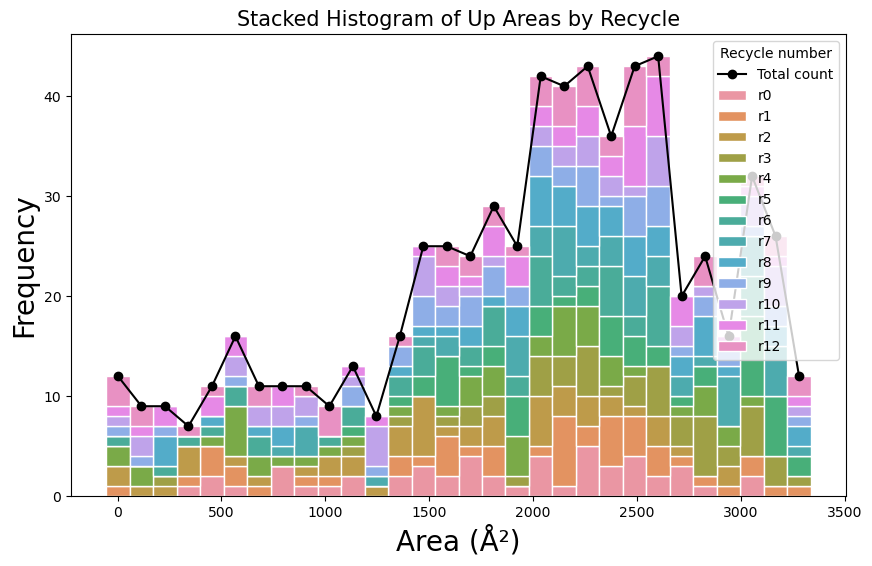

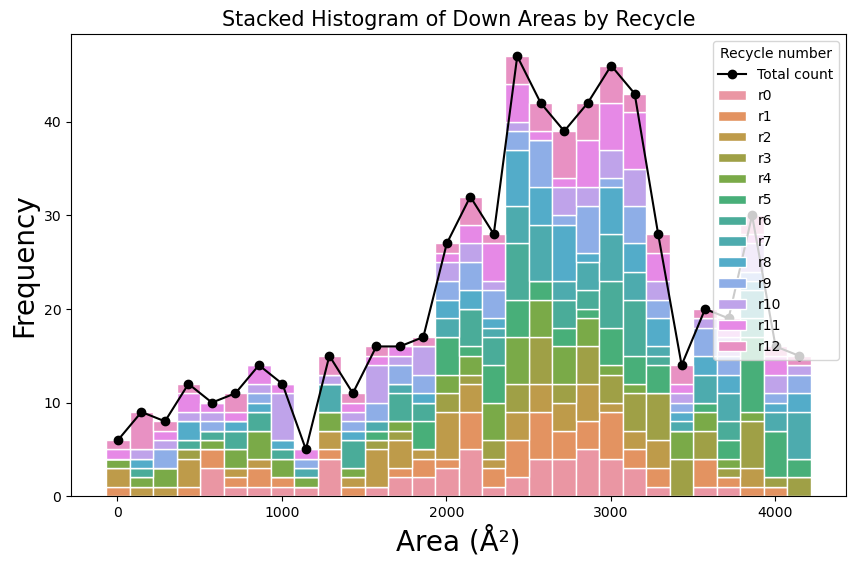

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re

# Define the residues for "Up" and "Down"
residues_Up = [('ASP', 108), ('ASN', 439), ('PHE', 817), ('LEU', 1155)]  # Example residues for "Up"
residues_Down = [('ILE', 68), ('TYR', 465), ('ILE', 841), ('TYR', 1129)]  # Example residues for "Down"
chain = 'A'

# Define the folder with PDB files
pdb_folder = '/Users/adrianahernandezgonzalez/LabNotebook/structuresAlphas/structureAlphas'  # Replace with your actual folder path

# Function to extract recycle number from filename
def extract_rNumber(filename):
    pattern = re.compile(r'_r(\d+)_')
    match = pattern.search(filename)
    if match:
        return int(match.group(1))
    return None

# Store results for both up and down areas
data_up = []
data_down = []

# Process each PDB file
for pdb_file in os.listdir(pdb_folder):
    if pdb_file.endswith(".pdb"):
        pdb_file_path = os.path.join(pdb_folder, pdb_file)
        
        # Extract recycle number
        rNumber = extract_rNumber(pdb_file)
        
        # Calculate the area for the "up" residues
        _, area_up = calculate_area_from_residues_with_chain(pdb_file_path, residues_Up, chain)
        # Calculate the area for the "down" residues
        _, area_down = calculate_area_from_residues_with_chain(pdb_file_path, residues_Down, chain)

        # Append the areas and recycle numbers to the respective lists
        if rNumber is not None:
            data_up.append((rNumber, area_up))
            data_down.append((rNumber, area_down))

# Define the color palette for rNUMBER (same as before)
colors = [
    '#ea96a3',  # Recycle 0
    '#e39361',  # Recycle 1
    '#be9b4a',  # Recycle 2
    '#9fa046',  # Recycle 3
    '#7aaa48',  # Recycle 4
    '#48af79',  # Recycle 5
    '#4aac99',  # Recycle 6
    '#4dabae',  # Recycle 7
    '#53acc9',  # Recycle 8
    '#8eaee7',  # Recycle 9
    '#bfa3ea',  # Recycle 10
    '#e689e6',  # Recycle 11
    '#e891c3'   # Recycle 12
]

# Function to plot stacked histograms for "Up" and "Down" areas by recycle number
def plot_stacked_histogram_for_areas_by_recycle(data, title, bins=25):
    # Separate data by rNUMBER and area values
    rNumbers = [item[0] for item in data]
    area_values = [item[1] for item in data]

    # Define the bins based on the area values
    bin_edges = np.linspace(min(area_values), max(area_values), bins+1)
    bin_counts = np.zeros((len(colors), bins))  # Rows correspond to rNUMBERS, columns to bins

    # Count occurrences for each rNUMBER in each bin
    for rNumber, area_value in zip(rNumbers, area_values):
        bin_index = np.digitize(area_value, bin_edges) - 1  # Get the bin index for the value
        bin_index = np.clip(bin_index, 0, bins-1)  # Ensure the bin index stays within bounds
        bin_counts[rNumber % len(colors), bin_index] += 1  # Add to the corresponding rNUMBER

    # Plot the stacked histogram
    fig, ax = plt.subplots(figsize=(10, 6))
    
    cumulative_counts = np.zeros(bins)  # Track the cumulative count for stacking

    # Stack the bars for each rNUMBER
    for i, color in enumerate(colors):
        ax.bar(bin_edges[:-1], bin_counts[i], width=np.diff(bin_edges), bottom=cumulative_counts, color=color, edgecolor='white', label=f'r{i}')
        cumulative_counts += bin_counts[i]

    # Add a line plot showing the total number of models per bin
    total_counts = np.sum(bin_counts, axis=0)
    ax.plot(bin_edges[:-1], total_counts, color='black', marker='o', linestyle='-', label='Total count')

    # Formatting the plot
    plt.title(title, fontsize=15)
    plt.xlabel('Area (Å²)', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    plt.legend(title='Recycle number', loc='upper right')
    plt.show()

# Plot the histogram for "Up" areas
plot_stacked_histogram_for_areas_by_recycle(data_up, 'Stacked Histogram of Up Areas by Recycle', bins=30)

# Plot the histogram for "Down" areas
plot_stacked_histogram_for_areas_by_recycle(data_down, 'Stacked Histogram of Down Areas by Recycle', bins=30)


In [56]:
#experimentalUp and Down
# Define the residues for "Up" and "Down"
experimental_pdb='/Users/adrianahernandezgonzalez/LabNotebook/structuresAlphas/structureAlphas/8hlp.pdb'
residues_Up_experimental = [('LEU', 211), ('ASN', 550), ('PHE', 928), ('LEU', 1247)]  # Example residues for "Up"
residues_Down_experimental = [('ILE', 179), ('TYR', 576), ('ILE', 968), ('TYR', 1243)]  # Example residues for "Down"
chain = 'A'


residue_pairs_distances, area = calculate_area_from_residues_with_chain(experimental_pdb, residues_Down_experimental, chain)

print("\nResidue pairs and distances:")
for pair, distance in residue_pairs_distances.items():
    print(f"{pair}: {distance:.2f} Å")

print(f"\nTotal area: {area:.2f} square Å")



Residue pairs and coordinates:
ILE179 (CA: (131.501, 196.789, 187.366)) to TYR576 (CA: (160.915, 196.466, 127.703)): Distance = 66.52 Å
TYR576 (CA: (160.915, 196.466, 127.703)) to ILE968 (CA: (175.815, 129.848, 138.317)): Distance = 69.08 Å
ILE968 (CA: (175.815, 129.848, 138.317)) to TYR1243 (CA: (137.207, 146.317, 190.019)): Distance = 66.60 Å
TYR1243 (CA: (137.207, 146.317, 190.019)) to ILE179 (CA: (131.501, 196.789, 187.366)): Distance = 50.86 Å

Area formed by the residues: 1904.67 square Å

Residue pairs and distances:
ILE179-TYR576: 66.52 Å
TYR576-ILE968: 69.08 Å
ILE968-TYR1243: 66.60 Å
TYR1243-ILE179: 50.86 Å

Total area: 1904.67 square Å


In [ ]:
#DOWN

#8df7
Residue pairs and distances:
ILE179-TYR576: 68.05 Å
TYR576-ILE948: 73.08 Å
ILE948-TYR1220: 64.67 Å
TYR1220-ILE179: 52.12 Å

Total area: 3259.80 square Å

#8wea
Residue pairs and distances:
ILE179-TYR576: 68.02 Å
TYR576-ILE968: 76.81 Å
ILE968-TYR1243: 69.02 Å
TYR1243-ILE179: 49.40 Å

Total area: 3443.91 square Å
    
#8we6
Residue pairs and distances:
ILE179-TYR576: 66.11 Å
TYR576-ILE968: 70.15 Å
ILE968-TYR1243: 66.13 Å
TYR1243-ILE179: 50.72 Å

Total area: 3154.36 square Å
    
#8we7
Residue pairs and distances:
ILE179-TYR576: 67.87 Å
TYR576-ILE968: 69.66 Å
ILE968-TYR1243: 67.40 Å
TYR1243-ILE179: 49.96 Å

Total area: 3220.45 square Å
    
#8we8
Residue pairs and distances:
ILE179-TYR576: 65.92 Å
TYR576-ILE968: 70.27 Å
ILE968-TYR1243: 66.19 Å
TYR1243-ILE179: 50.73 Å

Total area: 3153.07 square Å
    
#8we9
Residue pairs and distances:
ILE179-TYR576: 66.57 Å
TYR576-ILE968: 69.83 Å
ILE968-TYR1243: 65.84 Å
TYR1243-ILE179: 51.66 Å

Total area: 3166.22 square Å
    
#8eog
Residue pairs and distances:
ILE179-TYR576: 69.01 Å
TYR576-ILE948: 73.91 Å
ILE948-TYR1220: 64.66 Å
TYR1220-ILE179: 53.66 Å

Total area: 3334.91 square Å
    
#8hpl
Residue pairs and distances:
ILE179-TYR576: 66.52 Å
TYR576-ILE968: 69.08 Å
ILE968-TYR1243: 66.60 Å
TYR1243-ILE179: 50.86 Å

Total area: 1904.67 square Å


In [59]:
import os
import pandas as pd
from biopandas.pdb import PandasPdb

# Define the residues for "Up" and "Down"
residues_Up = [('LEU', 211), ('ASN', 550), ('PHE', 928), ('LEU', 1247)]
residues_Down = [('ILE', 179), ('TYR', 576), ('ILE', 948), ('TYR', 1220)]

# Function to calculate area given residue coordinates
def calculate_area(residues, pdb):
    # Extract coordinates of alpha carbons for the residues
    coords = []
    for residue in residues:
        res_name, res_num = residue
        atom = pdb.df['ATOM'][(pdb.df['ATOM']['residue_name'] == res_name) & (pdb.df['ATOM']['residue_number'] == res_num) & (pdb.df['ATOM']['atom_name'] == 'CA')]
        if not atom.empty:
            coords.append(atom[['x_coord', 'y_coord', 'z_coord']].values[0])
    
    # Use the coordinates to calculate area (you can apply a specific formula if needed)
    if len(coords) == 4:
        # Dummy area calculation (replace with actual formula for area between 4 points)
        area = sum([((coords[i][0] - coords[(i+1)%4][0])**2 + (coords[i][1] - coords[(i+1)%4][1])**2)**0.5 for i in range(4)])
    else:
        area = None  # Handle cases where residue not found
    return area

# Function to process PDB files
def process_pdb_files(folder_path):
    data = []
    
    # Loop through all PDB files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".pdb"):
            pdb = PandasPdb().read_pdb(os.path.join(folder_path, filename))
            
            # Calculate areas for Up and Down regions
            area_up = calculate_area(residues_Up, pdb)
            area_down = calculate_area(residues_Down, pdb)
            
            # Store in the dataframe
            data.append({
                'Filename': filename,
                'Area_Up': area_up,
                'Area_Down': area_down
            })
    
    # Create a DataFrame
    df = pd.DataFrame(data)
    return df

# Define the folder containing PDB files
folder_path = '/Users/adrianahernandezgonzalez/LabNotebook/10-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_8_16_10/pdb/'  # Replace with your actual folder path

# Process PDB files and get the dataframe
df = process_pdb_files(folder_path)

# Display the DataFrame
print(df)

# Save the DataFrame to CSV if needed
df.to_csv('pdb_area_analysis.csv', index=False)


ModuleNotFoundError: No module named 'biopandas'